In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading data into dataframe

data1 = pd.read_csv("more.csv")
benign_urls = data1[data1['Label'] == 0]
phishing_urls = data1[data1['Label'] == 1]
random_benign_urls = benign_urls.sample(n=20000, random_state=42)
random_phishing_urls = phishing_urls.sample(n=20000, random_state=42)
sampled_dataset = pd.concat([random_benign_urls, random_phishing_urls])
data = sampled_dataset.sample(frac=1).reset_index(drop=True)
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,sites.google.com,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
1,lolikon.co,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,depositphotos.com,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,bdnews24.com,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,nesn.com,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#Shape of dataframe

data.shape

(40000, 18)

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         40000 non-null  object
 1   Have_IP        40000 non-null  int64 
 2   Have_At        40000 non-null  int64 
 3   URL_Length     40000 non-null  int64 
 4   URL_Depth      40000 non-null  int64 
 5   Redirection    40000 non-null  int64 
 6   https_Domain   40000 non-null  int64 
 7   TinyURL        40000 non-null  int64 
 8   Prefix/Suffix  40000 non-null  int64 
 9   DNS_Record     40000 non-null  int64 
 10  Web_Traffic    40000 non-null  int64 
 11  Domain_Age     40000 non-null  int64 
 12  Domain_End     40000 non-null  int64 
 13  iFrame         40000 non-null  int64 
 14  Mouse_Over     40000 non-null  int64 
 15  Right_Click    40000 non-null  int64 
 16  Web_Forwards   40000 non-null  int64 
 17  Label          40000 non-null  int64 
dtypes: int64(17), object(1)
me

In [6]:
# nunique value in columns

data.nunique()

Domain           13309
Have_IP              1
Have_At              2
URL_Length           2
URL_Depth           20
Redirection          2
https_Domain         2
TinyURL              2
Prefix/Suffix        2
DNS_Record           1
Web_Traffic          1
Domain_Age           1
Domain_End           1
iFrame               1
Mouse_Over           1
Right_Click          1
Web_Forwards         1
Label                2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Domain'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Have_At,40000.0,0.009100,0.094960,0.0,0.0,0.0,0.0,1.0
URL_Length,40000.0,0.713675,0.452049,0.0,0.0,1.0,1.0,1.0
URL_Depth,40000.0,2.257675,2.077050,0.0,1.0,2.0,3.0,32.0
Redirection,40000.0,0.011975,0.108775,0.0,0.0,0.0,0.0,1.0
https_Domain,40000.0,0.000275,0.016581,0.0,0.0,0.0,0.0,1.0
TinyURL,40000.0,0.056175,0.230262,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,40000.0,0.209500,0.406957,0.0,0.0,0.0,0.0,1.0
DNS_Record,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Web_Traffic,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


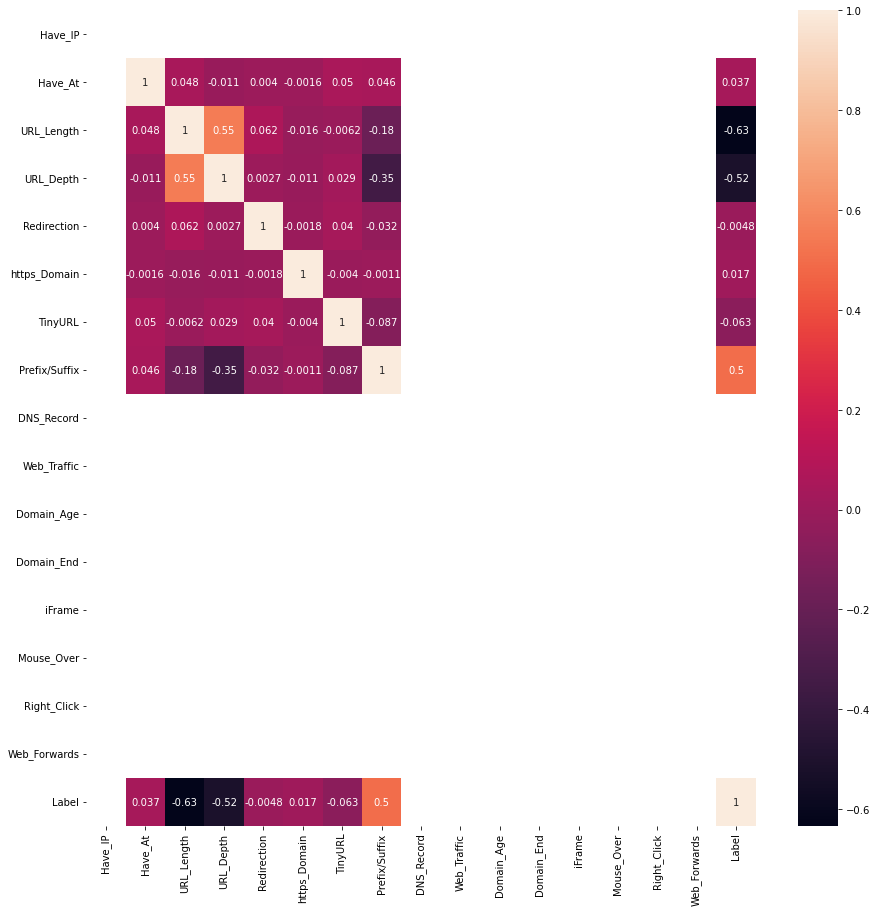

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [10]:
print(data.columns)


Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')


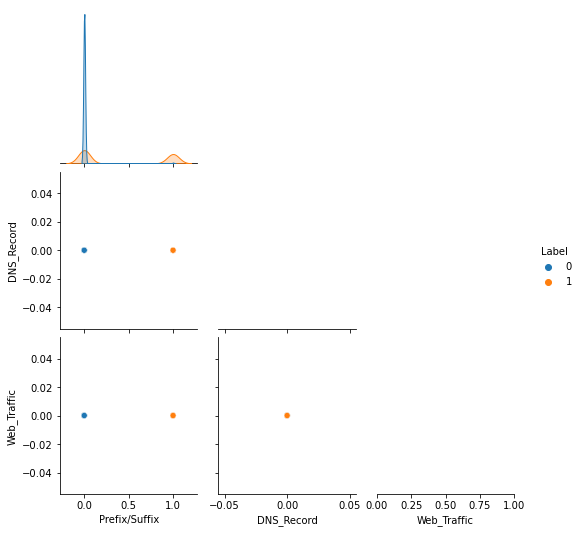

In [11]:
#pairplot for particular features

#df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
#sns.pairplot(data = df,hue="class",corner=True);

# Select relevant columns
df = data[['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label']]

# Plot pairplot
sns.pairplot(data=df, hue="Label", corner=True);





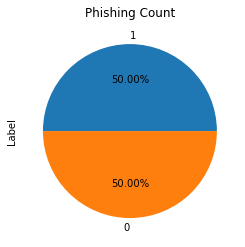

In [12]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

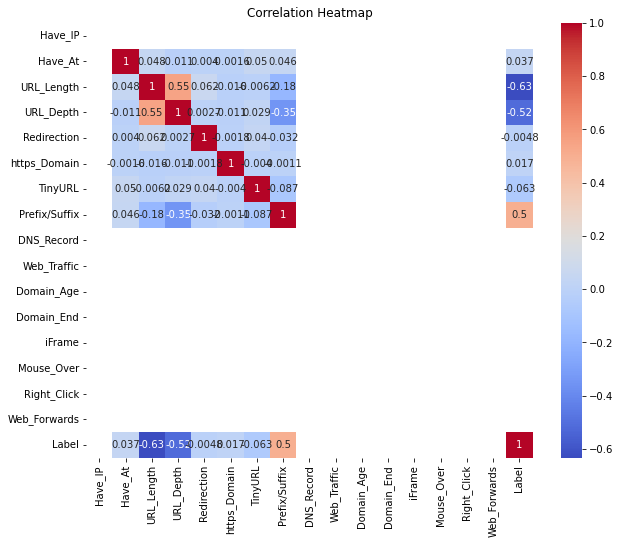

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



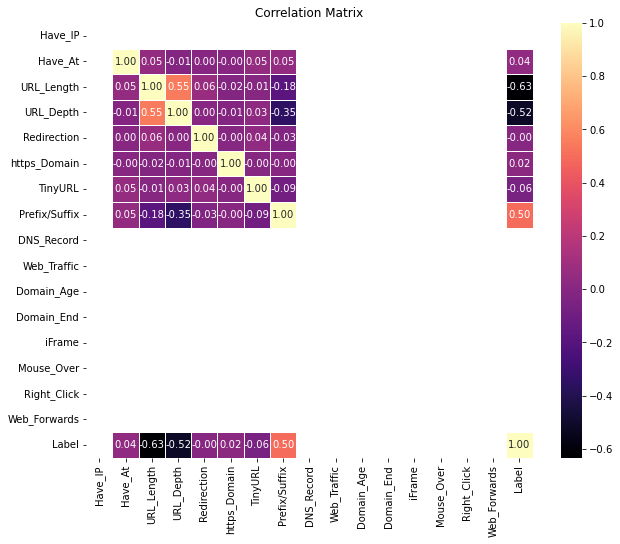

In [14]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)  # Change 'magma' to any other colormap you prefer
plt.title('Correlation Matrix')
plt.show()


In [15]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [16]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32000, 16), (32000,), (8000, 16), (8000,))

In [17]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Performing k-fold cross-validation
# kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# # Initializing RFECV with Random Forest as the estimator
# rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# # Fitting RFECV on the training data
# rfecv.fit(X_train_scaled, y_train)

# # Creating an empty DataFrame with column names
# df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

# # Loop through the features and append each row to the DataFrame
# for i in range(X.shape[1]):
#     row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
#     df_features = pd.concat([df_features, pd.DataFrame([row])], ignore_index=True)

# # Sorting the DataFrame based on feature ranking
# df_features = df_features.sort_values(by='ranking')

# # Filtering out features selected by RFECV
# df_features = df_features[df_features['support']]

# # Extracting the names of selected features
# best_features = df_features['feature'].tolist()

# # Selecting only the best features
# X_train_selected = X_train[best_features]
# X_test_selected = X_test[best_features]

# # Get feature importances from the RandomForestClassifier
# feature_importances = rfecv.estimator_.feature_importances_

# # Combine features and importances into a list of tuples
# feature_scores = list(zip(best_features, feature_importances))

# # Sort features based on importance scores in descending order
# sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# # Print the selected features along with their importance scores in descending order
# print("Selected Features and Importance Scores (Descending Order):")
# for feature, score in sorted_features:
#     print(f"{feature}: {score}")


In [18]:
# best_features=['URL_Length','Prefix/Suffix','URL_Depth','TinyURL','Redirection']
# # Subset the training and test datasets to include only the selected features
# X= X[best_features]
# # X_test_selected = X_test[selected_features]
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [19]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [20]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [21]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [22]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.897
Logistic Regression : Accuracy on test Data: 0.898

Logistic Regression : f1_score on training Data: 0.885
Logistic Regression : f1_score on test Data: 0.890

Logistic Regression : Recall on training Data: 0.797
Logistic Regression : Recall on test Data: 0.807

Logistic Regression : precision on training Data: 0.993
Logistic Regression : precision on test Data: 0.993


In [23]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      3910
           1       0.99      0.81      0.89      4090

    accuracy                           0.90      8000
   macro avg       0.91      0.90      0.90      8000
weighted avg       0.91      0.90      0.90      8000



In [24]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

<AxesSubplot:>

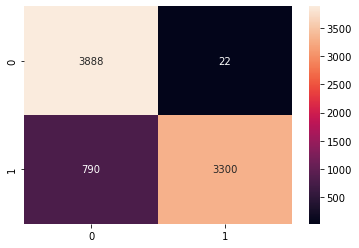

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_log)
sns.heatmap(confusion_matrix(y_test, y_test_log), annot = True, fmt='0.0f')

In [26]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [28]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.906
K-Nearest Neighbors : Accuracy on test Data: 0.908

K-Nearest Neighbors : f1_score on training Data: 0.897
K-Nearest Neighbors : f1_score on test Data: 0.903

K-Nearest Neighborsn : Recall on training Data: 0.821
Logistic Regression : Recall on test Data: 0.830

K-Nearest Neighbors : precision on training Data: 0.988
K-Nearest Neighbors : precision on test Data: 0.989


In [29]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



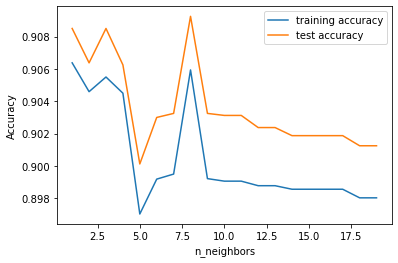

In [30]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

<AxesSubplot:>

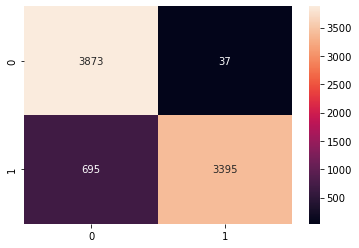

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn)
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt='0.0f')

In [33]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [34]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.905
Support Vector Machine : Accuracy on test Data: 0.907

Support Vector Machine : f1_score on training Data: 0.895
Support Vector Machine : f1_score on test Data: 0.902

Support Vector Machine : Recall on training Data: 0.818
Support Vector Machine : Recall on test Data: 0.829

Support Vector Machine : precision on training Data: 0.988
Support Vector Machine : precision on test Data: 0.988


In [36]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<AxesSubplot:>

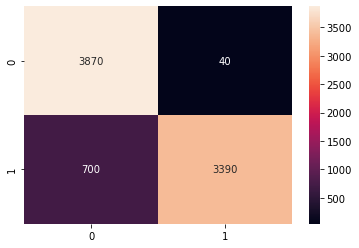

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [39]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [40]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [41]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.896
Naive Bayes Classifier : Accuracy on test Data: 0.897

Naive Bayes Classifier : f1_score on training Data: 0.884
Naive Bayes Classifier : f1_score on test Data: 0.890

Naive Bayes Classifier : Recall on training Data: 0.801
Naive Bayes Classifier : Recall on test Data: 0.810

Naive Bayes Classifier : precision on training Data: 0.987
Naive Bayes Classifier : precision on test Data: 0.987


In [42]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<AxesSubplot:>

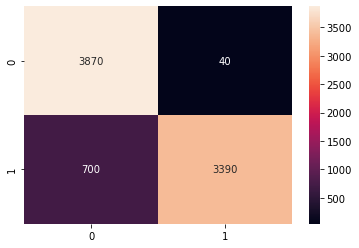

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [44]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [45]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [46]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [47]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.907
Decision Tree : Accuracy on test Data: 0.910

Decision Tree : f1_score on training Data: 0.898
Decision Tree : f1_score on test Data: 0.904

Decision Tree : Recall on training Data: 0.822
Decision Tree : Recall on test Data: 0.832

Decision Tree : precision on training Data: 0.989
Decision Tree : precision on test Data: 0.990


In [48]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



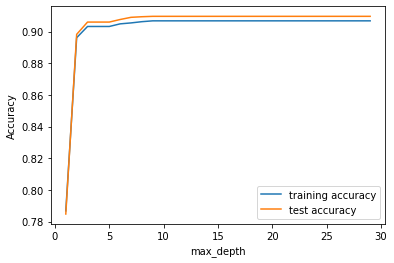

In [49]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [50]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

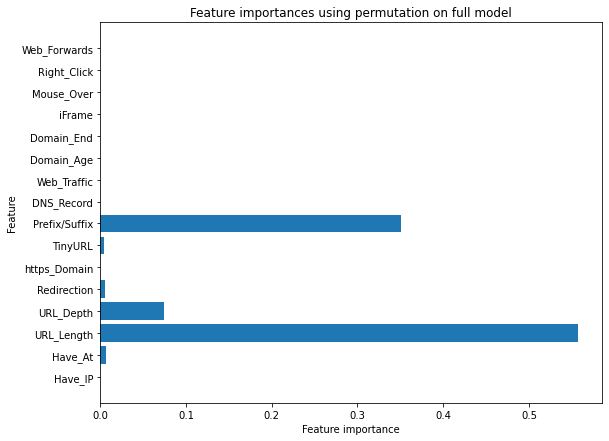

In [51]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [52]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [53]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [54]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.907
Random Forest : Accuracy on test Data: 0.910

Random Forest : f1_score on training Data: 0.898
Random Forest : f1_score on test Data: 0.904

Random Forest : Recall on training Data: 0.822
Random Forest : Recall on test Data: 0.832

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.990


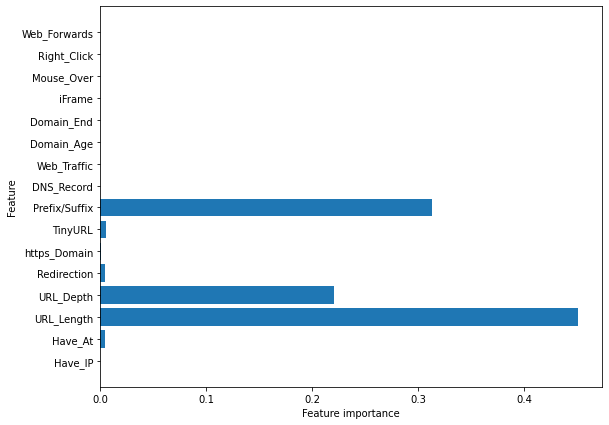

In [55]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [56]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



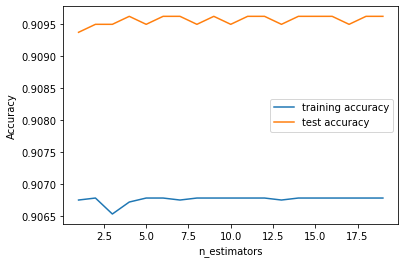

In [57]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [58]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [59]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [60]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [61]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.907
Gradient Boosting Classifier : Accuracy on test Data: 0.909

Gradient Boosting Classifier : f1_score on training Data: 0.898
Gradient Boosting Classifier : f1_score on test Data: 0.904

Gradient Boosting Classifier : Recall on training Data: 0.822
Gradient Boosting Classifier : Recall on test Data: 0.831

Gradient Boosting Classifier : precision on training Data: 0.989
Gradient Boosting Classifier : precision on test Data: 0.990


In [62]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



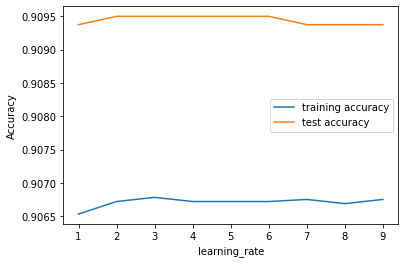

In [63]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

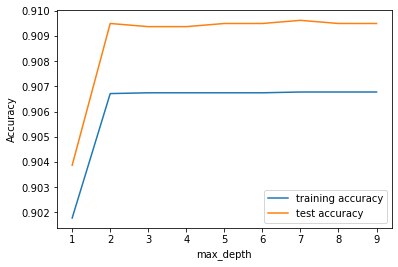

In [64]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [65]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [66]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5431285	total: 155ms	remaining: 2m 35s
1:	learn: 0.4471222	total: 169ms	remaining: 1m 24s
2:	learn: 0.3874315	total: 182ms	remaining: 1m
3:	learn: 0.3514443	total: 194ms	remaining: 48.3s
4:	learn: 0.3248932	total: 207ms	remaining: 41.1s
5:	learn: 0.3064110	total: 220ms	remaining: 36.5s
6:	learn: 0.2946559	total: 232ms	remaining: 32.9s
7:	learn: 0.2854644	total: 245ms	remaining: 30.3s
8:	learn: 0.2776952	total: 257ms	remaining: 28.3s
9:	learn: 0.2719870	total: 270ms	remaining: 26.7s
10:	learn: 0.2660434	total: 282ms	remaining: 25.4s
11:	learn: 0.2623930	total: 294ms	remaining: 24.2s
12:	learn: 0.2583360	total: 306ms	remaining: 23.2s
13:	learn: 0.2547394	total: 318ms	remaining: 22.4s
14:	learn: 0.2524963	total: 331ms	remaining: 21.7s
15:	learn: 0.2502333	total: 342ms	remaining: 21s
16:	learn: 0.2486038	total: 355ms	remaining: 20.5s
17:	learn: 0.2471899	total: 368ms	remaining: 20.1s
18:	learn: 0.2455194	total: 385ms	remaining: 19.9s
19:	learn: 0.2446683	total: 396ms	remaining:

163:	learn: 0.2323459	total: 2.16s	remaining: 11s
164:	learn: 0.2323447	total: 2.17s	remaining: 11s
165:	learn: 0.2323444	total: 2.18s	remaining: 11s
166:	learn: 0.2323443	total: 2.19s	remaining: 10.9s
167:	learn: 0.2323440	total: 2.2s	remaining: 10.9s
168:	learn: 0.2323415	total: 2.22s	remaining: 10.9s
169:	learn: 0.2323418	total: 2.23s	remaining: 10.9s
170:	learn: 0.2323425	total: 2.24s	remaining: 10.9s
171:	learn: 0.2323421	total: 2.25s	remaining: 10.8s
172:	learn: 0.2323416	total: 2.26s	remaining: 10.8s
173:	learn: 0.2323416	total: 2.27s	remaining: 10.8s
174:	learn: 0.2323416	total: 2.28s	remaining: 10.8s
175:	learn: 0.2323416	total: 2.29s	remaining: 10.7s
176:	learn: 0.2323416	total: 2.3s	remaining: 10.7s
177:	learn: 0.2323416	total: 2.31s	remaining: 10.7s
178:	learn: 0.2323416	total: 2.32s	remaining: 10.7s
179:	learn: 0.2323411	total: 2.33s	remaining: 10.6s
180:	learn: 0.2323411	total: 2.34s	remaining: 10.6s
181:	learn: 0.2323411	total: 2.36s	remaining: 10.6s
182:	learn: 0.232341

337:	learn: 0.2322949	total: 3.93s	remaining: 7.7s
338:	learn: 0.2322949	total: 3.94s	remaining: 7.68s
339:	learn: 0.2322949	total: 3.95s	remaining: 7.67s
340:	learn: 0.2322949	total: 3.96s	remaining: 7.66s
341:	learn: 0.2322949	total: 3.97s	remaining: 7.64s
342:	learn: 0.2322949	total: 3.98s	remaining: 7.63s
343:	learn: 0.2322949	total: 3.99s	remaining: 7.61s
344:	learn: 0.2322949	total: 4s	remaining: 7.59s
345:	learn: 0.2322949	total: 4.01s	remaining: 7.58s
346:	learn: 0.2322949	total: 4.02s	remaining: 7.56s
347:	learn: 0.2322949	total: 4.03s	remaining: 7.55s
348:	learn: 0.2322949	total: 4.04s	remaining: 7.54s
349:	learn: 0.2322949	total: 4.05s	remaining: 7.52s
350:	learn: 0.2322949	total: 4.06s	remaining: 7.5s
351:	learn: 0.2322949	total: 4.07s	remaining: 7.49s
352:	learn: 0.2322949	total: 4.08s	remaining: 7.47s
353:	learn: 0.2322949	total: 4.09s	remaining: 7.46s
354:	learn: 0.2322949	total: 4.1s	remaining: 7.44s
355:	learn: 0.2322949	total: 4.11s	remaining: 7.43s
356:	learn: 0.2322

514:	learn: 0.2322949	total: 5.71s	remaining: 5.38s
515:	learn: 0.2322949	total: 5.72s	remaining: 5.37s
516:	learn: 0.2322949	total: 5.74s	remaining: 5.36s
517:	learn: 0.2322949	total: 5.75s	remaining: 5.35s
518:	learn: 0.2322949	total: 5.75s	remaining: 5.33s
519:	learn: 0.2322949	total: 5.76s	remaining: 5.32s
520:	learn: 0.2322949	total: 5.77s	remaining: 5.31s
521:	learn: 0.2322949	total: 5.78s	remaining: 5.29s
522:	learn: 0.2322949	total: 5.79s	remaining: 5.28s
523:	learn: 0.2322949	total: 5.8s	remaining: 5.27s
524:	learn: 0.2322949	total: 5.81s	remaining: 5.26s
525:	learn: 0.2322949	total: 5.82s	remaining: 5.25s
526:	learn: 0.2322949	total: 5.83s	remaining: 5.23s
527:	learn: 0.2322949	total: 5.84s	remaining: 5.22s
528:	learn: 0.2322949	total: 5.85s	remaining: 5.21s
529:	learn: 0.2322949	total: 5.86s	remaining: 5.2s
530:	learn: 0.2322949	total: 5.87s	remaining: 5.18s
531:	learn: 0.2322949	total: 5.88s	remaining: 5.17s
532:	learn: 0.2322949	total: 5.89s	remaining: 5.16s
533:	learn: 0.

677:	learn: 0.2322949	total: 7.47s	remaining: 3.55s
678:	learn: 0.2322949	total: 7.49s	remaining: 3.54s
679:	learn: 0.2322949	total: 7.5s	remaining: 3.53s
680:	learn: 0.2322949	total: 7.51s	remaining: 3.52s
681:	learn: 0.2322949	total: 7.52s	remaining: 3.5s
682:	learn: 0.2322949	total: 7.53s	remaining: 3.49s
683:	learn: 0.2322949	total: 7.54s	remaining: 3.48s
684:	learn: 0.2322949	total: 7.55s	remaining: 3.47s
685:	learn: 0.2322949	total: 7.56s	remaining: 3.46s
686:	learn: 0.2322949	total: 7.57s	remaining: 3.45s
687:	learn: 0.2322949	total: 7.58s	remaining: 3.44s
688:	learn: 0.2322949	total: 7.59s	remaining: 3.42s
689:	learn: 0.2322949	total: 7.6s	remaining: 3.41s
690:	learn: 0.2322949	total: 7.61s	remaining: 3.4s
691:	learn: 0.2322949	total: 7.62s	remaining: 3.39s
692:	learn: 0.2322949	total: 7.63s	remaining: 3.38s
693:	learn: 0.2322949	total: 7.64s	remaining: 3.37s
694:	learn: 0.2322949	total: 7.65s	remaining: 3.36s
695:	learn: 0.2322949	total: 7.66s	remaining: 3.34s
696:	learn: 0.23

853:	learn: 0.2322949	total: 9.23s	remaining: 1.58s
854:	learn: 0.2322949	total: 9.24s	remaining: 1.57s
855:	learn: 0.2322949	total: 9.25s	remaining: 1.56s
856:	learn: 0.2322949	total: 9.26s	remaining: 1.54s
857:	learn: 0.2322949	total: 9.27s	remaining: 1.53s
858:	learn: 0.2322949	total: 9.28s	remaining: 1.52s
859:	learn: 0.2322949	total: 9.29s	remaining: 1.51s
860:	learn: 0.2322949	total: 9.3s	remaining: 1.5s
861:	learn: 0.2322949	total: 9.31s	remaining: 1.49s
862:	learn: 0.2322949	total: 9.32s	remaining: 1.48s
863:	learn: 0.2322949	total: 9.33s	remaining: 1.47s
864:	learn: 0.2322949	total: 9.34s	remaining: 1.46s
865:	learn: 0.2322949	total: 9.35s	remaining: 1.45s
866:	learn: 0.2322949	total: 9.36s	remaining: 1.44s
867:	learn: 0.2322949	total: 9.37s	remaining: 1.42s
868:	learn: 0.2322949	total: 9.37s	remaining: 1.41s
869:	learn: 0.2322949	total: 9.38s	remaining: 1.4s
870:	learn: 0.2322949	total: 9.39s	remaining: 1.39s
871:	learn: 0.2322949	total: 9.4s	remaining: 1.38s
872:	learn: 0.23

In [67]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [68]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.907
CatBoost Classifier : Accuracy on test Data: 0.910

CatBoost Classifier : f1_score on training Data: 0.898
CatBoost Classifier : f1_score on test Data: 0.904

CatBoost Classifier : Recall on training Data: 0.822
CatBoost Classifier : Recall on test Data: 0.832

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.990


In [69]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3910
           1       0.99      0.83      0.90      4090

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



In [70]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5431285	total: 15.1ms	remaining: 15.1s
1:	learn: 0.4471222	total: 30.5ms	remaining: 15.2s
2:	learn: 0.3874315	total: 44.6ms	remaining: 14.8s
3:	learn: 0.3514443	total: 61ms	remaining: 15.2s
4:	learn: 0.3248932	total: 73.7ms	remaining: 14.7s
5:	learn: 0.3064110	total: 86.4ms	remaining: 14.3s
6:	learn: 0.2946559	total: 98.2ms	remaining: 13.9s
7:	learn: 0.2854644	total: 110ms	remaining: 13.7s
8:	learn: 0.2776952	total: 122ms	remaining: 13.5s
9:	learn: 0.2719870	total: 137ms	remaining: 13.6s
10:	learn: 0.2660434	total: 151ms	remaining: 13.6s
11:	learn: 0.2623930	total: 165ms	remaining: 13.6s
12:	learn: 0.2583360	total: 178ms	remaining: 13.5s
13:	learn: 0.2547394	total: 190ms	remaining: 13.4s
14:	learn: 0.2524963	total: 202ms	remaining: 13.3s
15:	learn: 0.2502333	total: 215ms	remaining: 13.2s
16:	learn: 0.2486038	total: 228ms	remaining: 13.2s
17:	learn: 0.2471899	total: 247ms	remaining: 13.5s
18:	learn: 0.2455194	total: 261ms	remaining: 13.4s
19:	learn: 0.2446683	total: 275ms	re

169:	learn: 0.2323418	total: 2.13s	remaining: 10.4s
170:	learn: 0.2323425	total: 2.14s	remaining: 10.4s
171:	learn: 0.2323421	total: 2.15s	remaining: 10.4s
172:	learn: 0.2323416	total: 2.17s	remaining: 10.4s
173:	learn: 0.2323416	total: 2.18s	remaining: 10.3s
174:	learn: 0.2323416	total: 2.19s	remaining: 10.3s
175:	learn: 0.2323416	total: 2.2s	remaining: 10.3s
176:	learn: 0.2323416	total: 2.22s	remaining: 10.3s
177:	learn: 0.2323416	total: 2.23s	remaining: 10.3s
178:	learn: 0.2323416	total: 2.25s	remaining: 10.3s
179:	learn: 0.2323411	total: 2.26s	remaining: 10.3s
180:	learn: 0.2323411	total: 2.27s	remaining: 10.3s
181:	learn: 0.2323411	total: 2.29s	remaining: 10.3s
182:	learn: 0.2323411	total: 2.3s	remaining: 10.3s
183:	learn: 0.2323411	total: 2.31s	remaining: 10.2s
184:	learn: 0.2323411	total: 2.32s	remaining: 10.2s
185:	learn: 0.2323411	total: 2.33s	remaining: 10.2s
186:	learn: 0.2323411	total: 2.34s	remaining: 10.2s
187:	learn: 0.2323411	total: 2.35s	remaining: 10.2s
188:	learn: 0.

331:	learn: 0.2322949	total: 3.89s	remaining: 7.83s
332:	learn: 0.2322949	total: 3.9s	remaining: 7.82s
333:	learn: 0.2322949	total: 3.91s	remaining: 7.8s
334:	learn: 0.2322949	total: 3.92s	remaining: 7.79s
335:	learn: 0.2322949	total: 3.94s	remaining: 7.78s
336:	learn: 0.2322949	total: 3.94s	remaining: 7.76s
337:	learn: 0.2322949	total: 3.95s	remaining: 7.75s
338:	learn: 0.2322949	total: 3.96s	remaining: 7.73s
339:	learn: 0.2322949	total: 3.98s	remaining: 7.72s
340:	learn: 0.2322949	total: 3.98s	remaining: 7.7s
341:	learn: 0.2322949	total: 4s	remaining: 7.69s
342:	learn: 0.2322949	total: 4.01s	remaining: 7.67s
343:	learn: 0.2322949	total: 4.02s	remaining: 7.66s
344:	learn: 0.2322949	total: 4.03s	remaining: 7.65s
345:	learn: 0.2322949	total: 4.04s	remaining: 7.63s
346:	learn: 0.2322949	total: 4.05s	remaining: 7.62s
347:	learn: 0.2322949	total: 4.06s	remaining: 7.61s
348:	learn: 0.2322949	total: 4.07s	remaining: 7.59s
349:	learn: 0.2322949	total: 4.08s	remaining: 7.58s
350:	learn: 0.2322

505:	learn: 0.2322949	total: 5.67s	remaining: 5.54s
506:	learn: 0.2322949	total: 5.68s	remaining: 5.52s
507:	learn: 0.2322949	total: 5.69s	remaining: 5.51s
508:	learn: 0.2322949	total: 5.71s	remaining: 5.5s
509:	learn: 0.2322949	total: 5.72s	remaining: 5.5s
510:	learn: 0.2322949	total: 5.73s	remaining: 5.49s
511:	learn: 0.2322949	total: 5.75s	remaining: 5.48s
512:	learn: 0.2322949	total: 5.76s	remaining: 5.47s
513:	learn: 0.2322949	total: 5.77s	remaining: 5.46s
514:	learn: 0.2322949	total: 5.78s	remaining: 5.45s
515:	learn: 0.2322949	total: 5.79s	remaining: 5.43s
516:	learn: 0.2322949	total: 5.81s	remaining: 5.42s
517:	learn: 0.2322949	total: 5.82s	remaining: 5.41s
518:	learn: 0.2322949	total: 5.83s	remaining: 5.4s
519:	learn: 0.2322949	total: 5.84s	remaining: 5.39s
520:	learn: 0.2322949	total: 5.85s	remaining: 5.38s
521:	learn: 0.2322949	total: 5.86s	remaining: 5.37s
522:	learn: 0.2322949	total: 5.87s	remaining: 5.35s
523:	learn: 0.2322949	total: 5.88s	remaining: 5.34s
524:	learn: 0.2

671:	learn: 0.2322949	total: 7.39s	remaining: 3.61s
672:	learn: 0.2322949	total: 7.41s	remaining: 3.6s
673:	learn: 0.2322949	total: 7.42s	remaining: 3.59s
674:	learn: 0.2322949	total: 7.43s	remaining: 3.58s
675:	learn: 0.2322949	total: 7.44s	remaining: 3.56s
676:	learn: 0.2322949	total: 7.45s	remaining: 3.55s
677:	learn: 0.2322949	total: 7.46s	remaining: 3.54s
678:	learn: 0.2322949	total: 7.47s	remaining: 3.53s
679:	learn: 0.2322949	total: 7.48s	remaining: 3.52s
680:	learn: 0.2322949	total: 7.49s	remaining: 3.51s
681:	learn: 0.2322949	total: 7.5s	remaining: 3.5s
682:	learn: 0.2322949	total: 7.51s	remaining: 3.48s
683:	learn: 0.2322949	total: 7.52s	remaining: 3.47s
684:	learn: 0.2322949	total: 7.53s	remaining: 3.46s
685:	learn: 0.2322949	total: 7.54s	remaining: 3.45s
686:	learn: 0.2322949	total: 7.55s	remaining: 3.44s
687:	learn: 0.2322949	total: 7.56s	remaining: 3.43s
688:	learn: 0.2322949	total: 7.57s	remaining: 3.42s
689:	learn: 0.2322949	total: 7.58s	remaining: 3.4s
690:	learn: 0.23

841:	learn: 0.2322949	total: 9.13s	remaining: 1.71s
842:	learn: 0.2322949	total: 9.15s	remaining: 1.7s
843:	learn: 0.2322949	total: 9.16s	remaining: 1.69s
844:	learn: 0.2322949	total: 9.17s	remaining: 1.68s
845:	learn: 0.2322949	total: 9.19s	remaining: 1.67s
846:	learn: 0.2322949	total: 9.21s	remaining: 1.66s
847:	learn: 0.2322949	total: 9.22s	remaining: 1.65s
848:	learn: 0.2322949	total: 9.24s	remaining: 1.64s
849:	learn: 0.2322949	total: 9.25s	remaining: 1.63s
850:	learn: 0.2322949	total: 9.27s	remaining: 1.62s
851:	learn: 0.2322949	total: 9.28s	remaining: 1.61s
852:	learn: 0.2322949	total: 9.3s	remaining: 1.6s
853:	learn: 0.2322949	total: 9.31s	remaining: 1.59s
854:	learn: 0.2322949	total: 9.33s	remaining: 1.58s
855:	learn: 0.2322949	total: 9.34s	remaining: 1.57s
856:	learn: 0.2322949	total: 9.36s	remaining: 1.56s
857:	learn: 0.2322949	total: 9.37s	remaining: 1.55s
858:	learn: 0.2322949	total: 9.38s	remaining: 1.54s
859:	learn: 0.2322949	total: 9.39s	remaining: 1.53s
860:	learn: 0.2

0:	learn: 0.4436425	total: 14.6ms	remaining: 14.6s
1:	learn: 0.3452217	total: 29.9ms	remaining: 14.9s
2:	learn: 0.3017496	total: 44.9ms	remaining: 14.9s
3:	learn: 0.2806630	total: 60.2ms	remaining: 15s
4:	learn: 0.2672759	total: 73.6ms	remaining: 14.6s
5:	learn: 0.2579277	total: 87.1ms	remaining: 14.4s
6:	learn: 0.2516489	total: 101ms	remaining: 14.3s
7:	learn: 0.2478206	total: 115ms	remaining: 14.2s
8:	learn: 0.2451636	total: 128ms	remaining: 14.1s
9:	learn: 0.2426020	total: 142ms	remaining: 14.1s
10:	learn: 0.2409261	total: 156ms	remaining: 14s
11:	learn: 0.2406073	total: 165ms	remaining: 13.6s
12:	learn: 0.2392679	total: 180ms	remaining: 13.7s
13:	learn: 0.2385982	total: 193ms	remaining: 13.6s
14:	learn: 0.2378755	total: 208ms	remaining: 13.6s
15:	learn: 0.2373408	total: 221ms	remaining: 13.6s
16:	learn: 0.2367844	total: 235ms	remaining: 13.6s
17:	learn: 0.2363712	total: 247ms	remaining: 13.5s
18:	learn: 0.2359367	total: 261ms	remaining: 13.5s
19:	learn: 0.2359095	total: 272ms	remai

173:	learn: 0.2322399	total: 2.15s	remaining: 10.2s
174:	learn: 0.2322399	total: 2.16s	remaining: 10.2s
175:	learn: 0.2322399	total: 2.17s	remaining: 10.2s
176:	learn: 0.2322399	total: 2.18s	remaining: 10.1s
177:	learn: 0.2322399	total: 2.19s	remaining: 10.1s
178:	learn: 0.2322399	total: 2.2s	remaining: 10.1s
179:	learn: 0.2322399	total: 2.21s	remaining: 10.1s
180:	learn: 0.2322399	total: 2.22s	remaining: 10s
181:	learn: 0.2322399	total: 2.23s	remaining: 10s
182:	learn: 0.2322399	total: 2.24s	remaining: 9.99s
183:	learn: 0.2322399	total: 2.25s	remaining: 9.96s
184:	learn: 0.2322399	total: 2.26s	remaining: 9.94s
185:	learn: 0.2322399	total: 2.27s	remaining: 9.91s
186:	learn: 0.2322399	total: 2.27s	remaining: 9.89s
187:	learn: 0.2322399	total: 2.29s	remaining: 9.87s
188:	learn: 0.2322399	total: 2.3s	remaining: 9.86s
189:	learn: 0.2322399	total: 2.31s	remaining: 9.83s
190:	learn: 0.2322399	total: 2.32s	remaining: 9.81s
191:	learn: 0.2322399	total: 2.33s	remaining: 9.79s
192:	learn: 0.2322

346:	learn: 0.2322399	total: 4.06s	remaining: 7.63s
347:	learn: 0.2322399	total: 4.07s	remaining: 7.62s
348:	learn: 0.2322399	total: 4.08s	remaining: 7.61s
349:	learn: 0.2322399	total: 4.09s	remaining: 7.59s
350:	learn: 0.2322399	total: 4.1s	remaining: 7.58s
351:	learn: 0.2322399	total: 4.11s	remaining: 7.57s
352:	learn: 0.2322399	total: 4.12s	remaining: 7.55s
353:	learn: 0.2322399	total: 4.13s	remaining: 7.54s
354:	learn: 0.2322399	total: 4.14s	remaining: 7.53s
355:	learn: 0.2322399	total: 4.15s	remaining: 7.51s
356:	learn: 0.2322399	total: 4.16s	remaining: 7.5s
357:	learn: 0.2322399	total: 4.17s	remaining: 7.49s
358:	learn: 0.2322399	total: 4.18s	remaining: 7.47s
359:	learn: 0.2322399	total: 4.2s	remaining: 7.46s
360:	learn: 0.2322399	total: 4.21s	remaining: 7.45s
361:	learn: 0.2322399	total: 4.22s	remaining: 7.43s
362:	learn: 0.2322399	total: 4.23s	remaining: 7.42s
363:	learn: 0.2322399	total: 4.24s	remaining: 7.41s
364:	learn: 0.2322399	total: 4.25s	remaining: 7.4s
365:	learn: 0.23

505:	learn: 0.2322399	total: 5.84s	remaining: 5.7s
506:	learn: 0.2322399	total: 5.86s	remaining: 5.69s
507:	learn: 0.2322399	total: 5.87s	remaining: 5.68s
508:	learn: 0.2322399	total: 5.88s	remaining: 5.67s
509:	learn: 0.2322399	total: 5.89s	remaining: 5.66s
510:	learn: 0.2322399	total: 5.9s	remaining: 5.64s
511:	learn: 0.2322399	total: 5.91s	remaining: 5.63s
512:	learn: 0.2322399	total: 5.92s	remaining: 5.62s
513:	learn: 0.2322399	total: 5.93s	remaining: 5.61s
514:	learn: 0.2322399	total: 5.94s	remaining: 5.59s
515:	learn: 0.2322399	total: 5.95s	remaining: 5.58s
516:	learn: 0.2322399	total: 5.96s	remaining: 5.57s
517:	learn: 0.2322399	total: 5.97s	remaining: 5.55s
518:	learn: 0.2322399	total: 5.98s	remaining: 5.54s
519:	learn: 0.2322399	total: 5.99s	remaining: 5.53s
520:	learn: 0.2322399	total: 6s	remaining: 5.52s
521:	learn: 0.2322399	total: 6.01s	remaining: 5.5s
522:	learn: 0.2322399	total: 6.02s	remaining: 5.49s
523:	learn: 0.2322399	total: 6.03s	remaining: 5.48s
524:	learn: 0.2322

674:	learn: 0.2322399	total: 7.6s	remaining: 3.66s
675:	learn: 0.2322399	total: 7.61s	remaining: 3.65s
676:	learn: 0.2322399	total: 7.62s	remaining: 3.63s
677:	learn: 0.2322399	total: 7.63s	remaining: 3.62s
678:	learn: 0.2322399	total: 7.64s	remaining: 3.61s
679:	learn: 0.2322399	total: 7.65s	remaining: 3.6s
680:	learn: 0.2322399	total: 7.66s	remaining: 3.59s
681:	learn: 0.2322399	total: 7.67s	remaining: 3.58s
682:	learn: 0.2322399	total: 7.68s	remaining: 3.56s
683:	learn: 0.2322399	total: 7.69s	remaining: 3.55s
684:	learn: 0.2322399	total: 7.7s	remaining: 3.54s
685:	learn: 0.2322399	total: 7.71s	remaining: 3.53s
686:	learn: 0.2322399	total: 7.71s	remaining: 3.52s
687:	learn: 0.2322399	total: 7.72s	remaining: 3.5s
688:	learn: 0.2322399	total: 7.74s	remaining: 3.49s
689:	learn: 0.2322399	total: 7.74s	remaining: 3.48s
690:	learn: 0.2322399	total: 7.75s	remaining: 3.47s
691:	learn: 0.2322399	total: 7.76s	remaining: 3.46s
692:	learn: 0.2322399	total: 7.78s	remaining: 3.44s
693:	learn: 0.23

843:	learn: 0.2322399	total: 9.35s	remaining: 1.73s
844:	learn: 0.2322399	total: 9.36s	remaining: 1.72s
845:	learn: 0.2322399	total: 9.37s	remaining: 1.71s
846:	learn: 0.2322399	total: 9.38s	remaining: 1.69s
847:	learn: 0.2322399	total: 9.39s	remaining: 1.68s
848:	learn: 0.2322399	total: 9.4s	remaining: 1.67s
849:	learn: 0.2322399	total: 9.41s	remaining: 1.66s
850:	learn: 0.2322399	total: 9.42s	remaining: 1.65s
851:	learn: 0.2322399	total: 9.43s	remaining: 1.64s
852:	learn: 0.2322399	total: 9.44s	remaining: 1.63s
853:	learn: 0.2322399	total: 9.45s	remaining: 1.61s
854:	learn: 0.2322399	total: 9.46s	remaining: 1.6s
855:	learn: 0.2322399	total: 9.47s	remaining: 1.59s
856:	learn: 0.2322399	total: 9.48s	remaining: 1.58s
857:	learn: 0.2322399	total: 9.49s	remaining: 1.57s
858:	learn: 0.2322399	total: 9.5s	remaining: 1.56s
859:	learn: 0.2322399	total: 9.51s	remaining: 1.55s
860:	learn: 0.2322399	total: 9.52s	remaining: 1.54s
861:	learn: 0.2322399	total: 9.53s	remaining: 1.53s
862:	learn: 0.2

5:	learn: 0.2463986	total: 77.5ms	remaining: 12.8s
6:	learn: 0.2425778	total: 91.5ms	remaining: 13s
7:	learn: 0.2407524	total: 104ms	remaining: 12.9s
8:	learn: 0.2395014	total: 117ms	remaining: 12.9s
9:	learn: 0.2377639	total: 130ms	remaining: 12.8s
10:	learn: 0.2373980	total: 143ms	remaining: 12.9s
11:	learn: 0.2371899	total: 157ms	remaining: 12.9s
12:	learn: 0.2368462	total: 169ms	remaining: 12.9s
13:	learn: 0.2358633	total: 183ms	remaining: 12.9s
14:	learn: 0.2354967	total: 197ms	remaining: 12.9s
15:	learn: 0.2352370	total: 209ms	remaining: 12.8s
16:	learn: 0.2350386	total: 221ms	remaining: 12.8s
17:	learn: 0.2349095	total: 233ms	remaining: 12.7s
18:	learn: 0.2348571	total: 243ms	remaining: 12.5s
19:	learn: 0.2344348	total: 255ms	remaining: 12.5s
20:	learn: 0.2341094	total: 267ms	remaining: 12.4s
21:	learn: 0.2339009	total: 281ms	remaining: 12.5s
22:	learn: 0.2338343	total: 295ms	remaining: 12.5s
23:	learn: 0.2336997	total: 306ms	remaining: 12.4s
24:	learn: 0.2335799	total: 317ms	re

170:	learn: 0.2322645	total: 1.84s	remaining: 8.92s
171:	learn: 0.2322645	total: 1.85s	remaining: 8.91s
172:	learn: 0.2322645	total: 1.86s	remaining: 8.9s
173:	learn: 0.2322645	total: 1.87s	remaining: 8.88s
174:	learn: 0.2322645	total: 1.88s	remaining: 8.87s
175:	learn: 0.2322645	total: 1.89s	remaining: 8.86s
176:	learn: 0.2322645	total: 1.9s	remaining: 8.84s
177:	learn: 0.2322645	total: 1.91s	remaining: 8.83s
178:	learn: 0.2322645	total: 1.92s	remaining: 8.82s
179:	learn: 0.2322645	total: 1.93s	remaining: 8.8s
180:	learn: 0.2322645	total: 1.94s	remaining: 8.79s
181:	learn: 0.2322645	total: 1.95s	remaining: 8.78s
182:	learn: 0.2322645	total: 1.96s	remaining: 8.77s
183:	learn: 0.2322645	total: 1.97s	remaining: 8.75s
184:	learn: 0.2322645	total: 1.98s	remaining: 8.74s
185:	learn: 0.2322645	total: 1.99s	remaining: 8.73s
186:	learn: 0.2322645	total: 2s	remaining: 8.71s
187:	learn: 0.2322645	total: 2.02s	remaining: 8.7s
188:	learn: 0.2322645	total: 2.03s	remaining: 8.7s
189:	learn: 0.232264

340:	learn: 0.2322645	total: 3.61s	remaining: 6.97s
341:	learn: 0.2322645	total: 3.62s	remaining: 6.96s
342:	learn: 0.2322645	total: 3.63s	remaining: 6.95s
343:	learn: 0.2322645	total: 3.64s	remaining: 6.94s
344:	learn: 0.2322645	total: 3.65s	remaining: 6.93s
345:	learn: 0.2322645	total: 3.66s	remaining: 6.92s
346:	learn: 0.2322645	total: 3.67s	remaining: 6.91s
347:	learn: 0.2322645	total: 3.68s	remaining: 6.89s
348:	learn: 0.2322645	total: 3.69s	remaining: 6.88s
349:	learn: 0.2322645	total: 3.7s	remaining: 6.87s
350:	learn: 0.2322645	total: 3.71s	remaining: 6.86s
351:	learn: 0.2322645	total: 3.72s	remaining: 6.85s
352:	learn: 0.2322645	total: 3.73s	remaining: 6.84s
353:	learn: 0.2322645	total: 3.74s	remaining: 6.82s
354:	learn: 0.2322645	total: 3.75s	remaining: 6.81s
355:	learn: 0.2322645	total: 3.76s	remaining: 6.8s
356:	learn: 0.2322645	total: 3.77s	remaining: 6.79s
357:	learn: 0.2322645	total: 3.78s	remaining: 6.78s
358:	learn: 0.2322645	total: 3.79s	remaining: 6.76s
359:	learn: 0.

511:	learn: 0.2322645	total: 5.34s	remaining: 5.09s
512:	learn: 0.2322645	total: 5.35s	remaining: 5.08s
513:	learn: 0.2322645	total: 5.36s	remaining: 5.07s
514:	learn: 0.2322645	total: 5.37s	remaining: 5.05s
515:	learn: 0.2322645	total: 5.38s	remaining: 5.04s
516:	learn: 0.2322645	total: 5.39s	remaining: 5.03s
517:	learn: 0.2322645	total: 5.4s	remaining: 5.02s
518:	learn: 0.2322645	total: 5.41s	remaining: 5.01s
519:	learn: 0.2322645	total: 5.42s	remaining: 5s
520:	learn: 0.2322645	total: 5.43s	remaining: 4.99s
521:	learn: 0.2322645	total: 5.44s	remaining: 4.98s
522:	learn: 0.2322645	total: 5.45s	remaining: 4.97s
523:	learn: 0.2322645	total: 5.46s	remaining: 4.96s
524:	learn: 0.2322645	total: 5.47s	remaining: 4.95s
525:	learn: 0.2322645	total: 5.48s	remaining: 4.94s
526:	learn: 0.2322645	total: 5.49s	remaining: 4.93s
527:	learn: 0.2322645	total: 5.5s	remaining: 4.92s
528:	learn: 0.2322645	total: 5.51s	remaining: 4.91s
529:	learn: 0.2322645	total: 5.53s	remaining: 4.9s
530:	learn: 0.2322

680:	learn: 0.2322645	total: 7.08s	remaining: 3.32s
681:	learn: 0.2322645	total: 7.09s	remaining: 3.31s
682:	learn: 0.2322645	total: 7.11s	remaining: 3.3s
683:	learn: 0.2322645	total: 7.12s	remaining: 3.29s
684:	learn: 0.2322645	total: 7.13s	remaining: 3.28s
685:	learn: 0.2322645	total: 7.13s	remaining: 3.27s
686:	learn: 0.2322645	total: 7.14s	remaining: 3.25s
687:	learn: 0.2322645	total: 7.16s	remaining: 3.25s
688:	learn: 0.2322645	total: 7.17s	remaining: 3.23s
689:	learn: 0.2322645	total: 7.17s	remaining: 3.22s
690:	learn: 0.2322645	total: 7.18s	remaining: 3.21s
691:	learn: 0.2322645	total: 7.2s	remaining: 3.2s
692:	learn: 0.2322645	total: 7.2s	remaining: 3.19s
693:	learn: 0.2322645	total: 7.21s	remaining: 3.18s
694:	learn: 0.2322645	total: 7.22s	remaining: 3.17s
695:	learn: 0.2322645	total: 7.23s	remaining: 3.16s
696:	learn: 0.2322645	total: 7.24s	remaining: 3.15s
697:	learn: 0.2322645	total: 7.25s	remaining: 3.14s
698:	learn: 0.2322645	total: 7.26s	remaining: 3.13s
699:	learn: 0.23

851:	learn: 0.2322645	total: 8.82s	remaining: 1.53s
852:	learn: 0.2322645	total: 8.83s	remaining: 1.52s
853:	learn: 0.2322645	total: 8.84s	remaining: 1.51s
854:	learn: 0.2322645	total: 8.85s	remaining: 1.5s
855:	learn: 0.2322645	total: 8.86s	remaining: 1.49s
856:	learn: 0.2322645	total: 8.87s	remaining: 1.48s
857:	learn: 0.2322645	total: 8.88s	remaining: 1.47s
858:	learn: 0.2322645	total: 8.89s	remaining: 1.46s
859:	learn: 0.2322645	total: 8.9s	remaining: 1.45s
860:	learn: 0.2322645	total: 8.91s	remaining: 1.44s
861:	learn: 0.2322645	total: 8.92s	remaining: 1.43s
862:	learn: 0.2322645	total: 8.93s	remaining: 1.42s
863:	learn: 0.2322645	total: 8.94s	remaining: 1.41s
864:	learn: 0.2322645	total: 8.95s	remaining: 1.4s
865:	learn: 0.2322645	total: 8.96s	remaining: 1.39s
866:	learn: 0.2322645	total: 8.97s	remaining: 1.38s
867:	learn: 0.2322645	total: 8.98s	remaining: 1.37s
868:	learn: 0.2322645	total: 8.99s	remaining: 1.35s
869:	learn: 0.2322645	total: 9s	remaining: 1.34s
870:	learn: 0.2322

21:	learn: 0.2328846	total: 264ms	remaining: 11.8s
22:	learn: 0.2328651	total: 277ms	remaining: 11.8s
23:	learn: 0.2327854	total: 295ms	remaining: 12s
24:	learn: 0.2327737	total: 306ms	remaining: 11.9s
25:	learn: 0.2327737	total: 316ms	remaining: 11.9s
26:	learn: 0.2327465	total: 327ms	remaining: 11.8s
27:	learn: 0.2326865	total: 340ms	remaining: 11.8s
28:	learn: 0.2326153	total: 354ms	remaining: 11.9s
29:	learn: 0.2325454	total: 369ms	remaining: 11.9s
30:	learn: 0.2325270	total: 381ms	remaining: 11.9s
31:	learn: 0.2325080	total: 393ms	remaining: 11.9s
32:	learn: 0.2324875	total: 405ms	remaining: 11.9s
33:	learn: 0.2324402	total: 418ms	remaining: 11.9s
34:	learn: 0.2324096	total: 432ms	remaining: 11.9s
35:	learn: 0.2323837	total: 446ms	remaining: 11.9s
36:	learn: 0.2323237	total: 460ms	remaining: 12s
37:	learn: 0.2323211	total: 472ms	remaining: 11.9s
38:	learn: 0.2323165	total: 483ms	remaining: 11.9s
39:	learn: 0.2323155	total: 494ms	remaining: 11.9s
40:	learn: 0.2323155	total: 504ms	r

193:	learn: 0.2323155	total: 2.19s	remaining: 9.09s
194:	learn: 0.2323155	total: 2.2s	remaining: 9.09s
195:	learn: 0.2323155	total: 2.21s	remaining: 9.07s
196:	learn: 0.2323155	total: 2.22s	remaining: 9.06s
197:	learn: 0.2323155	total: 2.23s	remaining: 9.04s
198:	learn: 0.2323155	total: 2.24s	remaining: 9.03s
199:	learn: 0.2323155	total: 2.25s	remaining: 9.01s
200:	learn: 0.2323155	total: 2.26s	remaining: 8.99s
201:	learn: 0.2323155	total: 2.27s	remaining: 8.97s
202:	learn: 0.2323155	total: 2.28s	remaining: 8.96s
203:	learn: 0.2323155	total: 2.29s	remaining: 8.94s
204:	learn: 0.2323155	total: 2.3s	remaining: 8.93s
205:	learn: 0.2323155	total: 2.31s	remaining: 8.91s
206:	learn: 0.2323155	total: 2.32s	remaining: 8.9s
207:	learn: 0.2323155	total: 2.33s	remaining: 8.88s
208:	learn: 0.2323155	total: 2.34s	remaining: 8.87s
209:	learn: 0.2323155	total: 2.35s	remaining: 8.86s
210:	learn: 0.2323155	total: 2.36s	remaining: 8.84s
211:	learn: 0.2323155	total: 2.38s	remaining: 8.83s
212:	learn: 0.2

356:	learn: 0.2323155	total: 3.91s	remaining: 7.05s
357:	learn: 0.2323155	total: 3.92s	remaining: 7.04s
358:	learn: 0.2323155	total: 3.93s	remaining: 7.02s
359:	learn: 0.2323155	total: 3.97s	remaining: 7.06s
360:	learn: 0.2323155	total: 3.98s	remaining: 7.04s
361:	learn: 0.2323155	total: 3.99s	remaining: 7.03s
362:	learn: 0.2323155	total: 4s	remaining: 7.02s
363:	learn: 0.2323155	total: 4.01s	remaining: 7s
364:	learn: 0.2323155	total: 4.02s	remaining: 6.99s
365:	learn: 0.2323155	total: 4.03s	remaining: 6.98s
366:	learn: 0.2323155	total: 4.04s	remaining: 6.97s
367:	learn: 0.2323155	total: 4.05s	remaining: 6.95s
368:	learn: 0.2323155	total: 4.06s	remaining: 6.94s
369:	learn: 0.2323155	total: 4.07s	remaining: 6.93s
370:	learn: 0.2323155	total: 4.08s	remaining: 6.91s
371:	learn: 0.2323155	total: 4.09s	remaining: 6.9s
372:	learn: 0.2323155	total: 4.1s	remaining: 6.89s
373:	learn: 0.2323155	total: 4.11s	remaining: 6.88s
374:	learn: 0.2323155	total: 4.12s	remaining: 6.87s
375:	learn: 0.232315

518:	learn: 0.2323155	total: 5.66s	remaining: 5.24s
519:	learn: 0.2323155	total: 5.67s	remaining: 5.23s
520:	learn: 0.2323155	total: 5.68s	remaining: 5.23s
521:	learn: 0.2323155	total: 5.7s	remaining: 5.22s
522:	learn: 0.2323155	total: 5.71s	remaining: 5.21s
523:	learn: 0.2323155	total: 5.72s	remaining: 5.2s
524:	learn: 0.2323155	total: 5.73s	remaining: 5.19s
525:	learn: 0.2323155	total: 5.74s	remaining: 5.17s
526:	learn: 0.2323155	total: 5.75s	remaining: 5.16s
527:	learn: 0.2323155	total: 5.76s	remaining: 5.15s
528:	learn: 0.2323155	total: 5.77s	remaining: 5.14s
529:	learn: 0.2323155	total: 5.78s	remaining: 5.13s
530:	learn: 0.2323155	total: 5.79s	remaining: 5.12s
531:	learn: 0.2323155	total: 5.8s	remaining: 5.11s
532:	learn: 0.2323155	total: 5.81s	remaining: 5.09s
533:	learn: 0.2323155	total: 5.82s	remaining: 5.08s
534:	learn: 0.2323155	total: 5.83s	remaining: 5.07s
535:	learn: 0.2323155	total: 5.84s	remaining: 5.06s
536:	learn: 0.2323155	total: 5.85s	remaining: 5.05s
537:	learn: 0.2

682:	learn: 0.2323155	total: 7.38s	remaining: 3.43s
683:	learn: 0.2323155	total: 7.39s	remaining: 3.42s
684:	learn: 0.2323155	total: 7.41s	remaining: 3.4s
685:	learn: 0.2323155	total: 7.42s	remaining: 3.39s
686:	learn: 0.2323155	total: 7.43s	remaining: 3.38s
687:	learn: 0.2323155	total: 7.44s	remaining: 3.37s
688:	learn: 0.2323155	total: 7.45s	remaining: 3.36s
689:	learn: 0.2323155	total: 7.46s	remaining: 3.35s
690:	learn: 0.2323155	total: 7.47s	remaining: 3.34s
691:	learn: 0.2323155	total: 7.49s	remaining: 3.33s
692:	learn: 0.2323155	total: 7.5s	remaining: 3.32s
693:	learn: 0.2323155	total: 7.51s	remaining: 3.31s
694:	learn: 0.2323155	total: 7.52s	remaining: 3.3s
695:	learn: 0.2323155	total: 7.53s	remaining: 3.29s
696:	learn: 0.2323155	total: 7.54s	remaining: 3.28s
697:	learn: 0.2323155	total: 7.55s	remaining: 3.27s
698:	learn: 0.2323155	total: 7.57s	remaining: 3.26s
699:	learn: 0.2323155	total: 7.58s	remaining: 3.25s
700:	learn: 0.2323155	total: 7.59s	remaining: 3.24s
701:	learn: 0.2

846:	learn: 0.2323155	total: 9.11s	remaining: 1.65s
847:	learn: 0.2323155	total: 9.12s	remaining: 1.64s
848:	learn: 0.2323155	total: 9.14s	remaining: 1.62s
849:	learn: 0.2323155	total: 9.15s	remaining: 1.61s
850:	learn: 0.2323155	total: 9.16s	remaining: 1.6s
851:	learn: 0.2323155	total: 9.17s	remaining: 1.59s
852:	learn: 0.2323155	total: 9.18s	remaining: 1.58s
853:	learn: 0.2323155	total: 9.19s	remaining: 1.57s
854:	learn: 0.2323155	total: 9.2s	remaining: 1.56s
855:	learn: 0.2323155	total: 9.21s	remaining: 1.55s
856:	learn: 0.2323155	total: 9.21s	remaining: 1.54s
857:	learn: 0.2323155	total: 9.22s	remaining: 1.53s
858:	learn: 0.2323155	total: 9.24s	remaining: 1.52s
859:	learn: 0.2323155	total: 9.24s	remaining: 1.5s
860:	learn: 0.2323155	total: 9.26s	remaining: 1.49s
861:	learn: 0.2323155	total: 9.27s	remaining: 1.48s
862:	learn: 0.2323155	total: 9.28s	remaining: 1.47s
863:	learn: 0.2323155	total: 9.29s	remaining: 1.46s
864:	learn: 0.2323155	total: 9.29s	remaining: 1.45s
865:	learn: 0.2

17:	learn: 0.2330410	total: 220ms	remaining: 12s
18:	learn: 0.2330018	total: 234ms	remaining: 12.1s
19:	learn: 0.2328909	total: 248ms	remaining: 12.2s
20:	learn: 0.2327665	total: 262ms	remaining: 12.2s
21:	learn: 0.2327272	total: 276ms	remaining: 12.3s
22:	learn: 0.2326523	total: 288ms	remaining: 12.2s
23:	learn: 0.2326277	total: 300ms	remaining: 12.2s
24:	learn: 0.2325509	total: 312ms	remaining: 12.2s
25:	learn: 0.2324821	total: 324ms	remaining: 12.1s
26:	learn: 0.2324831	total: 335ms	remaining: 12.1s
27:	learn: 0.2323963	total: 347ms	remaining: 12s
28:	learn: 0.2323562	total: 359ms	remaining: 12s
29:	learn: 0.2323167	total: 370ms	remaining: 12s
30:	learn: 0.2323023	total: 382ms	remaining: 11.9s
31:	learn: 0.2322740	total: 393ms	remaining: 11.9s
32:	learn: 0.2322736	total: 404ms	remaining: 11.8s
33:	learn: 0.2322443	total: 418ms	remaining: 11.9s
34:	learn: 0.2321948	total: 433ms	remaining: 11.9s
35:	learn: 0.2321909	total: 444ms	remaining: 11.9s
36:	learn: 0.2321916	total: 454ms	remai

187:	learn: 0.2321743	total: 2.19s	remaining: 9.46s
188:	learn: 0.2321743	total: 2.2s	remaining: 9.45s
189:	learn: 0.2321743	total: 2.21s	remaining: 9.45s
190:	learn: 0.2321743	total: 2.23s	remaining: 9.44s
191:	learn: 0.2321743	total: 2.24s	remaining: 9.43s
192:	learn: 0.2321743	total: 2.25s	remaining: 9.41s
193:	learn: 0.2321743	total: 2.26s	remaining: 9.39s
194:	learn: 0.2321743	total: 2.27s	remaining: 9.37s
195:	learn: 0.2321743	total: 2.28s	remaining: 9.35s
196:	learn: 0.2321743	total: 2.29s	remaining: 9.33s
197:	learn: 0.2321743	total: 2.3s	remaining: 9.31s
198:	learn: 0.2321743	total: 2.31s	remaining: 9.29s
199:	learn: 0.2321743	total: 2.32s	remaining: 9.28s
200:	learn: 0.2321743	total: 2.33s	remaining: 9.26s
201:	learn: 0.2321743	total: 2.34s	remaining: 9.24s
202:	learn: 0.2321743	total: 2.35s	remaining: 9.23s
203:	learn: 0.2321743	total: 2.36s	remaining: 9.21s
204:	learn: 0.2321743	total: 2.37s	remaining: 9.2s
205:	learn: 0.2321743	total: 2.38s	remaining: 9.19s
206:	learn: 0.2

348:	learn: 0.2321743	total: 3.91s	remaining: 7.29s
349:	learn: 0.2321743	total: 3.92s	remaining: 7.28s
350:	learn: 0.2321743	total: 3.93s	remaining: 7.26s
351:	learn: 0.2321743	total: 3.94s	remaining: 7.25s
352:	learn: 0.2321743	total: 3.95s	remaining: 7.24s
353:	learn: 0.2321743	total: 3.96s	remaining: 7.23s
354:	learn: 0.2321743	total: 3.97s	remaining: 7.21s
355:	learn: 0.2321743	total: 3.98s	remaining: 7.2s
356:	learn: 0.2321743	total: 3.99s	remaining: 7.19s
357:	learn: 0.2321743	total: 4s	remaining: 7.17s
358:	learn: 0.2321743	total: 4.01s	remaining: 7.16s
359:	learn: 0.2321743	total: 4.02s	remaining: 7.15s
360:	learn: 0.2321743	total: 4.03s	remaining: 7.14s
361:	learn: 0.2321743	total: 4.04s	remaining: 7.13s
362:	learn: 0.2321743	total: 4.05s	remaining: 7.11s
363:	learn: 0.2321743	total: 4.06s	remaining: 7.1s
364:	learn: 0.2321743	total: 4.08s	remaining: 7.09s
365:	learn: 0.2321743	total: 4.09s	remaining: 7.08s
366:	learn: 0.2321743	total: 4.09s	remaining: 7.06s
367:	learn: 0.232

512:	learn: 0.2321743	total: 5.63s	remaining: 5.35s
513:	learn: 0.2321743	total: 5.64s	remaining: 5.33s
514:	learn: 0.2321743	total: 5.65s	remaining: 5.33s
515:	learn: 0.2321743	total: 5.67s	remaining: 5.31s
516:	learn: 0.2321743	total: 5.67s	remaining: 5.3s
517:	learn: 0.2321743	total: 5.68s	remaining: 5.29s
518:	learn: 0.2321743	total: 5.7s	remaining: 5.28s
519:	learn: 0.2321743	total: 5.71s	remaining: 5.27s
520:	learn: 0.2321743	total: 5.72s	remaining: 5.25s
521:	learn: 0.2321743	total: 5.73s	remaining: 5.24s
522:	learn: 0.2321743	total: 5.74s	remaining: 5.23s
523:	learn: 0.2321743	total: 5.75s	remaining: 5.22s
524:	learn: 0.2321743	total: 5.76s	remaining: 5.21s
525:	learn: 0.2321743	total: 5.77s	remaining: 5.2s
526:	learn: 0.2321743	total: 5.78s	remaining: 5.18s
527:	learn: 0.2321743	total: 5.79s	remaining: 5.17s
528:	learn: 0.2321743	total: 5.8s	remaining: 5.16s
529:	learn: 0.2321743	total: 5.81s	remaining: 5.15s
530:	learn: 0.2321743	total: 5.82s	remaining: 5.14s
531:	learn: 0.23

680:	learn: 0.2321743	total: 7.35s	remaining: 3.44s
681:	learn: 0.2321743	total: 7.36s	remaining: 3.43s
682:	learn: 0.2321743	total: 7.37s	remaining: 3.42s
683:	learn: 0.2321743	total: 7.38s	remaining: 3.41s
684:	learn: 0.2321743	total: 7.39s	remaining: 3.4s
685:	learn: 0.2321743	total: 7.4s	remaining: 3.39s
686:	learn: 0.2321743	total: 7.41s	remaining: 3.38s
687:	learn: 0.2321743	total: 7.42s	remaining: 3.36s
688:	learn: 0.2321743	total: 7.43s	remaining: 3.35s
689:	learn: 0.2321743	total: 7.44s	remaining: 3.34s
690:	learn: 0.2321743	total: 7.45s	remaining: 3.33s
691:	learn: 0.2321743	total: 7.46s	remaining: 3.32s
692:	learn: 0.2321743	total: 7.47s	remaining: 3.31s
693:	learn: 0.2321743	total: 7.48s	remaining: 3.3s
694:	learn: 0.2321743	total: 7.49s	remaining: 3.29s
695:	learn: 0.2321743	total: 7.5s	remaining: 3.28s
696:	learn: 0.2321743	total: 7.51s	remaining: 3.26s
697:	learn: 0.2321743	total: 7.52s	remaining: 3.25s
698:	learn: 0.2321743	total: 7.53s	remaining: 3.24s
699:	learn: 0.23

841:	learn: 0.2321743	total: 9.1s	remaining: 1.71s
842:	learn: 0.2321743	total: 9.11s	remaining: 1.7s
843:	learn: 0.2321743	total: 9.12s	remaining: 1.69s
844:	learn: 0.2321743	total: 9.13s	remaining: 1.68s
845:	learn: 0.2321743	total: 9.14s	remaining: 1.66s
846:	learn: 0.2321743	total: 9.15s	remaining: 1.65s
847:	learn: 0.2321743	total: 9.16s	remaining: 1.64s
848:	learn: 0.2321743	total: 9.17s	remaining: 1.63s
849:	learn: 0.2321743	total: 9.18s	remaining: 1.62s
850:	learn: 0.2321743	total: 9.19s	remaining: 1.61s
851:	learn: 0.2321743	total: 9.2s	remaining: 1.6s
852:	learn: 0.2321743	total: 9.21s	remaining: 1.59s
853:	learn: 0.2321743	total: 9.22s	remaining: 1.58s
854:	learn: 0.2321743	total: 9.23s	remaining: 1.56s
855:	learn: 0.2321743	total: 9.24s	remaining: 1.55s
856:	learn: 0.2321743	total: 9.25s	remaining: 1.54s
857:	learn: 0.2321743	total: 9.26s	remaining: 1.53s
858:	learn: 0.2321743	total: 9.27s	remaining: 1.52s
859:	learn: 0.2321743	total: 9.28s	remaining: 1.51s
860:	learn: 0.23

2:	learn: 0.2430723	total: 51.6ms	remaining: 17.2s
3:	learn: 0.2387252	total: 67.8ms	remaining: 16.9s
4:	learn: 0.2372426	total: 82.7ms	remaining: 16.5s
5:	learn: 0.2354925	total: 99.4ms	remaining: 16.5s
6:	learn: 0.2350006	total: 112ms	remaining: 15.9s
7:	learn: 0.2347049	total: 128ms	remaining: 15.9s
8:	learn: 0.2340607	total: 141ms	remaining: 15.6s
9:	learn: 0.2339997	total: 153ms	remaining: 15.2s
10:	learn: 0.2336362	total: 165ms	remaining: 14.8s
11:	learn: 0.2335079	total: 177ms	remaining: 14.6s
12:	learn: 0.2334997	total: 187ms	remaining: 14.2s
13:	learn: 0.2333834	total: 198ms	remaining: 14s
14:	learn: 0.2333021	total: 209ms	remaining: 13.7s
15:	learn: 0.2332014	total: 220ms	remaining: 13.5s
16:	learn: 0.2329952	total: 232ms	remaining: 13.4s
17:	learn: 0.2328850	total: 247ms	remaining: 13.5s
18:	learn: 0.2327264	total: 264ms	remaining: 13.6s
19:	learn: 0.2325787	total: 278ms	remaining: 13.6s
20:	learn: 0.2324962	total: 291ms	remaining: 13.6s
21:	learn: 0.2324067	total: 304ms	rem

166:	learn: 0.2321102	total: 1.81s	remaining: 9.05s
167:	learn: 0.2321102	total: 1.83s	remaining: 9.05s
168:	learn: 0.2321102	total: 1.84s	remaining: 9.04s
169:	learn: 0.2321102	total: 1.85s	remaining: 9.03s
170:	learn: 0.2321102	total: 1.86s	remaining: 9.02s
171:	learn: 0.2321102	total: 1.87s	remaining: 9s
172:	learn: 0.2321102	total: 1.88s	remaining: 8.99s
173:	learn: 0.2321102	total: 1.89s	remaining: 8.97s
174:	learn: 0.2321102	total: 1.9s	remaining: 8.96s
175:	learn: 0.2321102	total: 1.91s	remaining: 8.94s
176:	learn: 0.2321102	total: 1.92s	remaining: 8.93s
177:	learn: 0.2321102	total: 1.93s	remaining: 8.91s
178:	learn: 0.2321102	total: 1.94s	remaining: 8.9s
179:	learn: 0.2321102	total: 1.95s	remaining: 8.89s
180:	learn: 0.2321102	total: 1.96s	remaining: 8.88s
181:	learn: 0.2321102	total: 1.97s	remaining: 8.86s
182:	learn: 0.2321102	total: 1.98s	remaining: 8.85s
183:	learn: 0.2321102	total: 1.99s	remaining: 8.84s
184:	learn: 0.2321102	total: 2s	remaining: 8.82s
185:	learn: 0.232110

328:	learn: 0.2321102	total: 3.58s	remaining: 7.3s
329:	learn: 0.2321102	total: 3.59s	remaining: 7.29s
330:	learn: 0.2321102	total: 3.6s	remaining: 7.29s
331:	learn: 0.2321102	total: 3.62s	remaining: 7.28s
332:	learn: 0.2321102	total: 3.63s	remaining: 7.27s
333:	learn: 0.2321102	total: 3.64s	remaining: 7.25s
334:	learn: 0.2321102	total: 3.65s	remaining: 7.24s
335:	learn: 0.2321102	total: 3.66s	remaining: 7.23s
336:	learn: 0.2321102	total: 3.67s	remaining: 7.22s
337:	learn: 0.2321102	total: 3.68s	remaining: 7.21s
338:	learn: 0.2321102	total: 3.69s	remaining: 7.2s
339:	learn: 0.2321102	total: 3.7s	remaining: 7.18s
340:	learn: 0.2321102	total: 3.71s	remaining: 7.18s
341:	learn: 0.2321102	total: 3.73s	remaining: 7.17s
342:	learn: 0.2321102	total: 3.74s	remaining: 7.16s
343:	learn: 0.2321102	total: 3.75s	remaining: 7.15s
344:	learn: 0.2321102	total: 3.76s	remaining: 7.13s
345:	learn: 0.2321102	total: 3.77s	remaining: 7.12s
346:	learn: 0.2321102	total: 3.78s	remaining: 7.11s
347:	learn: 0.23

492:	learn: 0.2321102	total: 5.32s	remaining: 5.47s
493:	learn: 0.2321102	total: 5.33s	remaining: 5.46s
494:	learn: 0.2321102	total: 5.34s	remaining: 5.45s
495:	learn: 0.2321102	total: 5.36s	remaining: 5.44s
496:	learn: 0.2321102	total: 5.37s	remaining: 5.43s
497:	learn: 0.2321102	total: 5.38s	remaining: 5.42s
498:	learn: 0.2321102	total: 5.38s	remaining: 5.41s
499:	learn: 0.2321102	total: 5.4s	remaining: 5.4s
500:	learn: 0.2321102	total: 5.41s	remaining: 5.38s
501:	learn: 0.2321102	total: 5.42s	remaining: 5.37s
502:	learn: 0.2321102	total: 5.43s	remaining: 5.36s
503:	learn: 0.2321102	total: 5.44s	remaining: 5.35s
504:	learn: 0.2321102	total: 5.45s	remaining: 5.34s
505:	learn: 0.2321102	total: 5.46s	remaining: 5.33s
506:	learn: 0.2321102	total: 5.47s	remaining: 5.32s
507:	learn: 0.2321102	total: 5.48s	remaining: 5.31s
508:	learn: 0.2321102	total: 5.49s	remaining: 5.3s
509:	learn: 0.2321102	total: 5.5s	remaining: 5.29s
510:	learn: 0.2321102	total: 5.51s	remaining: 5.28s
511:	learn: 0.23

659:	learn: 0.2321102	total: 7.05s	remaining: 3.63s
660:	learn: 0.2321102	total: 7.06s	remaining: 3.62s
661:	learn: 0.2321102	total: 7.07s	remaining: 3.61s
662:	learn: 0.2321102	total: 7.08s	remaining: 3.6s
663:	learn: 0.2321102	total: 7.1s	remaining: 3.59s
664:	learn: 0.2321102	total: 7.11s	remaining: 3.58s
665:	learn: 0.2321102	total: 7.12s	remaining: 3.57s
666:	learn: 0.2321102	total: 7.13s	remaining: 3.56s
667:	learn: 0.2321102	total: 7.14s	remaining: 3.55s
668:	learn: 0.2321102	total: 7.15s	remaining: 3.54s
669:	learn: 0.2321102	total: 7.16s	remaining: 3.52s
670:	learn: 0.2321102	total: 7.17s	remaining: 3.52s
671:	learn: 0.2321102	total: 7.18s	remaining: 3.5s
672:	learn: 0.2321102	total: 7.19s	remaining: 3.49s
673:	learn: 0.2321102	total: 7.2s	remaining: 3.48s
674:	learn: 0.2321102	total: 7.21s	remaining: 3.47s
675:	learn: 0.2321102	total: 7.22s	remaining: 3.46s
676:	learn: 0.2321102	total: 7.23s	remaining: 3.45s
677:	learn: 0.2321102	total: 7.24s	remaining: 3.44s
678:	learn: 0.23

823:	learn: 0.2321102	total: 8.82s	remaining: 1.88s
824:	learn: 0.2321102	total: 8.83s	remaining: 1.87s
825:	learn: 0.2321102	total: 8.84s	remaining: 1.86s
826:	learn: 0.2321102	total: 8.86s	remaining: 1.85s
827:	learn: 0.2321102	total: 8.87s	remaining: 1.84s
828:	learn: 0.2321102	total: 8.87s	remaining: 1.83s
829:	learn: 0.2321102	total: 8.88s	remaining: 1.82s
830:	learn: 0.2321102	total: 8.89s	remaining: 1.81s
831:	learn: 0.2321102	total: 8.91s	remaining: 1.8s
832:	learn: 0.2321102	total: 8.92s	remaining: 1.79s
833:	learn: 0.2321102	total: 8.93s	remaining: 1.78s
834:	learn: 0.2321102	total: 8.94s	remaining: 1.76s
835:	learn: 0.2321102	total: 8.95s	remaining: 1.75s
836:	learn: 0.2321102	total: 8.96s	remaining: 1.74s
837:	learn: 0.2321102	total: 8.96s	remaining: 1.73s
838:	learn: 0.2321102	total: 8.97s	remaining: 1.72s
839:	learn: 0.2321102	total: 8.99s	remaining: 1.71s
840:	learn: 0.2321102	total: 8.99s	remaining: 1.7s
841:	learn: 0.2321102	total: 9.01s	remaining: 1.69s
842:	learn: 0.

987:	learn: 0.2321102	total: 10.5s	remaining: 128ms
988:	learn: 0.2321102	total: 10.6s	remaining: 117ms
989:	learn: 0.2321102	total: 10.6s	remaining: 107ms
990:	learn: 0.2321102	total: 10.6s	remaining: 96ms
991:	learn: 0.2321102	total: 10.6s	remaining: 85.4ms
992:	learn: 0.2321102	total: 10.6s	remaining: 74.7ms
993:	learn: 0.2321102	total: 10.6s	remaining: 64ms
994:	learn: 0.2321102	total: 10.6s	remaining: 53.3ms
995:	learn: 0.2321102	total: 10.6s	remaining: 42.7ms
996:	learn: 0.2321102	total: 10.6s	remaining: 32ms
997:	learn: 0.2321102	total: 10.6s	remaining: 21.3ms
998:	learn: 0.2321102	total: 10.7s	remaining: 10.7ms
999:	learn: 0.2321102	total: 10.7s	remaining: 0us
0:	learn: 0.2789659	total: 15.2ms	remaining: 15.2s
1:	learn: 0.2466200	total: 28.6ms	remaining: 14.3s
2:	learn: 0.2390004	total: 42.3ms	remaining: 14.1s
3:	learn: 0.2373516	total: 56ms	remaining: 14s
4:	learn: 0.2355773	total: 70.3ms	remaining: 14s
5:	learn: 0.2348455	total: 83.5ms	remaining: 13.8s
6:	learn: 0.2343928	tot

161:	learn: 0.2321962	total: 1.72s	remaining: 8.92s
162:	learn: 0.2321962	total: 1.73s	remaining: 8.91s
163:	learn: 0.2321962	total: 1.75s	remaining: 8.9s
164:	learn: 0.2321962	total: 1.76s	remaining: 8.9s
165:	learn: 0.2321962	total: 1.77s	remaining: 8.89s
166:	learn: 0.2321962	total: 1.78s	remaining: 8.87s
167:	learn: 0.2321962	total: 1.79s	remaining: 8.86s
168:	learn: 0.2321962	total: 1.8s	remaining: 8.85s
169:	learn: 0.2321962	total: 1.81s	remaining: 8.84s
170:	learn: 0.2321962	total: 1.82s	remaining: 8.83s
171:	learn: 0.2321962	total: 1.83s	remaining: 8.81s
172:	learn: 0.2321962	total: 1.84s	remaining: 8.79s
173:	learn: 0.2321962	total: 1.85s	remaining: 8.78s
174:	learn: 0.2321962	total: 1.86s	remaining: 8.76s
175:	learn: 0.2321962	total: 1.87s	remaining: 8.74s
176:	learn: 0.2321962	total: 1.88s	remaining: 8.73s
177:	learn: 0.2321962	total: 1.89s	remaining: 8.72s
178:	learn: 0.2321962	total: 1.9s	remaining: 8.7s
179:	learn: 0.2321962	total: 1.91s	remaining: 8.69s
180:	learn: 0.232

333:	learn: 0.2321962	total: 3.45s	remaining: 6.88s
334:	learn: 0.2321962	total: 3.46s	remaining: 6.87s
335:	learn: 0.2321962	total: 3.47s	remaining: 6.86s
336:	learn: 0.2321962	total: 3.48s	remaining: 6.85s
337:	learn: 0.2321962	total: 3.49s	remaining: 6.83s
338:	learn: 0.2321962	total: 3.5s	remaining: 6.83s
339:	learn: 0.2321962	total: 3.51s	remaining: 6.81s
340:	learn: 0.2321962	total: 3.52s	remaining: 6.8s
341:	learn: 0.2321962	total: 3.53s	remaining: 6.79s
342:	learn: 0.2321962	total: 3.54s	remaining: 6.78s
343:	learn: 0.2321962	total: 3.55s	remaining: 6.76s
344:	learn: 0.2321962	total: 3.56s	remaining: 6.75s
345:	learn: 0.2321962	total: 3.56s	remaining: 6.74s
346:	learn: 0.2321962	total: 3.58s	remaining: 6.73s
347:	learn: 0.2321962	total: 3.58s	remaining: 6.72s
348:	learn: 0.2321962	total: 3.59s	remaining: 6.71s
349:	learn: 0.2321962	total: 3.6s	remaining: 6.69s
350:	learn: 0.2321962	total: 3.61s	remaining: 6.68s
351:	learn: 0.2321962	total: 3.62s	remaining: 6.67s
352:	learn: 0.2

504:	learn: 0.2321962	total: 5.17s	remaining: 5.07s
505:	learn: 0.2321962	total: 5.18s	remaining: 5.06s
506:	learn: 0.2321962	total: 5.19s	remaining: 5.05s
507:	learn: 0.2321962	total: 5.2s	remaining: 5.04s
508:	learn: 0.2321962	total: 5.21s	remaining: 5.03s
509:	learn: 0.2321962	total: 5.22s	remaining: 5.02s
510:	learn: 0.2321962	total: 5.23s	remaining: 5.01s
511:	learn: 0.2321962	total: 5.24s	remaining: 5s
512:	learn: 0.2321962	total: 5.25s	remaining: 4.99s
513:	learn: 0.2321962	total: 5.26s	remaining: 4.97s
514:	learn: 0.2321962	total: 5.27s	remaining: 4.96s
515:	learn: 0.2321962	total: 5.28s	remaining: 4.95s
516:	learn: 0.2321962	total: 5.29s	remaining: 4.94s
517:	learn: 0.2321962	total: 5.3s	remaining: 4.93s
518:	learn: 0.2321962	total: 5.31s	remaining: 4.92s
519:	learn: 0.2321962	total: 5.32s	remaining: 4.91s
520:	learn: 0.2321962	total: 5.33s	remaining: 4.9s
521:	learn: 0.2321962	total: 5.34s	remaining: 4.89s
522:	learn: 0.2321962	total: 5.35s	remaining: 4.88s
523:	learn: 0.2321

681:	learn: 0.2321962	total: 6.93s	remaining: 3.23s
682:	learn: 0.2321962	total: 6.94s	remaining: 3.22s
683:	learn: 0.2321962	total: 6.95s	remaining: 3.21s
684:	learn: 0.2321962	total: 6.96s	remaining: 3.2s
685:	learn: 0.2321962	total: 6.97s	remaining: 3.19s
686:	learn: 0.2321962	total: 6.98s	remaining: 3.18s
687:	learn: 0.2321962	total: 6.99s	remaining: 3.17s
688:	learn: 0.2321962	total: 7s	remaining: 3.16s
689:	learn: 0.2321962	total: 7.01s	remaining: 3.15s
690:	learn: 0.2321962	total: 7.02s	remaining: 3.14s
691:	learn: 0.2321962	total: 7.03s	remaining: 3.13s
692:	learn: 0.2321962	total: 7.04s	remaining: 3.12s
693:	learn: 0.2321962	total: 7.04s	remaining: 3.11s
694:	learn: 0.2321962	total: 7.05s	remaining: 3.1s
695:	learn: 0.2321962	total: 7.06s	remaining: 3.08s
696:	learn: 0.2321962	total: 7.08s	remaining: 3.08s
697:	learn: 0.2321962	total: 7.08s	remaining: 3.06s
698:	learn: 0.2321962	total: 7.09s	remaining: 3.05s
699:	learn: 0.2321962	total: 7.1s	remaining: 3.04s
700:	learn: 0.2321

854:	learn: 0.2321962	total: 8.64s	remaining: 1.47s
855:	learn: 0.2321962	total: 8.65s	remaining: 1.46s
856:	learn: 0.2321962	total: 8.67s	remaining: 1.45s
857:	learn: 0.2321962	total: 8.7s	remaining: 1.44s
858:	learn: 0.2321962	total: 8.72s	remaining: 1.43s
859:	learn: 0.2321962	total: 8.73s	remaining: 1.42s
860:	learn: 0.2321962	total: 8.74s	remaining: 1.41s
861:	learn: 0.2321962	total: 8.75s	remaining: 1.4s
862:	learn: 0.2321962	total: 8.76s	remaining: 1.39s
863:	learn: 0.2321962	total: 8.77s	remaining: 1.38s
864:	learn: 0.2321962	total: 8.78s	remaining: 1.37s
865:	learn: 0.2321962	total: 8.79s	remaining: 1.36s
866:	learn: 0.2321962	total: 8.81s	remaining: 1.35s
867:	learn: 0.2321962	total: 8.82s	remaining: 1.34s
868:	learn: 0.2321962	total: 8.83s	remaining: 1.33s
869:	learn: 0.2321962	total: 8.84s	remaining: 1.32s
870:	learn: 0.2321962	total: 8.86s	remaining: 1.31s
871:	learn: 0.2321962	total: 8.87s	remaining: 1.3s
872:	learn: 0.2321962	total: 8.88s	remaining: 1.29s
873:	learn: 0.2

17:	learn: 0.2323730	total: 218ms	remaining: 11.9s
18:	learn: 0.2323321	total: 233ms	remaining: 12s
19:	learn: 0.2323321	total: 243ms	remaining: 11.9s
20:	learn: 0.2323321	total: 254ms	remaining: 11.8s
21:	learn: 0.2323321	total: 264ms	remaining: 11.7s
22:	learn: 0.2323321	total: 274ms	remaining: 11.7s
23:	learn: 0.2323321	total: 287ms	remaining: 11.7s
24:	learn: 0.2323321	total: 299ms	remaining: 11.7s
25:	learn: 0.2323321	total: 311ms	remaining: 11.7s
26:	learn: 0.2323321	total: 323ms	remaining: 11.6s
27:	learn: 0.2323321	total: 337ms	remaining: 11.7s
28:	learn: 0.2323321	total: 351ms	remaining: 11.7s
29:	learn: 0.2323321	total: 366ms	remaining: 11.8s
30:	learn: 0.2323321	total: 379ms	remaining: 11.9s
31:	learn: 0.2323321	total: 393ms	remaining: 11.9s
32:	learn: 0.2323321	total: 404ms	remaining: 11.8s
33:	learn: 0.2323321	total: 416ms	remaining: 11.8s
34:	learn: 0.2323321	total: 429ms	remaining: 11.8s
35:	learn: 0.2323321	total: 440ms	remaining: 11.8s
36:	learn: 0.2323321	total: 450ms

191:	learn: 0.2323321	total: 2.16s	remaining: 9.1s
192:	learn: 0.2323321	total: 2.17s	remaining: 9.09s
193:	learn: 0.2323321	total: 2.18s	remaining: 9.07s
194:	learn: 0.2323321	total: 2.19s	remaining: 9.05s
195:	learn: 0.2323321	total: 2.21s	remaining: 9.05s
196:	learn: 0.2323321	total: 2.21s	remaining: 9.03s
197:	learn: 0.2323321	total: 2.23s	remaining: 9.01s
198:	learn: 0.2323321	total: 2.24s	remaining: 9s
199:	learn: 0.2323321	total: 2.25s	remaining: 8.99s
200:	learn: 0.2323321	total: 2.26s	remaining: 8.97s
201:	learn: 0.2323321	total: 2.27s	remaining: 8.96s
202:	learn: 0.2323321	total: 2.28s	remaining: 8.95s
203:	learn: 0.2323321	total: 2.29s	remaining: 8.94s
204:	learn: 0.2323321	total: 2.3s	remaining: 8.93s
205:	learn: 0.2323321	total: 2.31s	remaining: 8.93s
206:	learn: 0.2323321	total: 2.33s	remaining: 8.91s
207:	learn: 0.2323321	total: 2.34s	remaining: 8.9s
208:	learn: 0.2323321	total: 2.35s	remaining: 8.89s
209:	learn: 0.2323321	total: 2.36s	remaining: 8.88s
210:	learn: 0.2323

359:	learn: 0.2323321	total: 4.1s	remaining: 7.29s
360:	learn: 0.2323321	total: 4.11s	remaining: 7.28s
361:	learn: 0.2323321	total: 4.12s	remaining: 7.26s
362:	learn: 0.2323321	total: 4.13s	remaining: 7.25s
363:	learn: 0.2323321	total: 4.14s	remaining: 7.24s
364:	learn: 0.2323321	total: 4.15s	remaining: 7.22s
365:	learn: 0.2323321	total: 4.16s	remaining: 7.21s
366:	learn: 0.2323321	total: 4.17s	remaining: 7.2s
367:	learn: 0.2323321	total: 4.18s	remaining: 7.19s
368:	learn: 0.2323321	total: 4.2s	remaining: 7.17s
369:	learn: 0.2323321	total: 4.21s	remaining: 7.17s
370:	learn: 0.2323321	total: 4.22s	remaining: 7.16s
371:	learn: 0.2323321	total: 4.23s	remaining: 7.15s
372:	learn: 0.2323321	total: 4.24s	remaining: 7.13s
373:	learn: 0.2323321	total: 4.26s	remaining: 7.12s
374:	learn: 0.2323321	total: 4.27s	remaining: 7.11s
375:	learn: 0.2323321	total: 4.28s	remaining: 7.1s
376:	learn: 0.2323321	total: 4.29s	remaining: 7.1s
377:	learn: 0.2323321	total: 4.3s	remaining: 7.08s
378:	learn: 0.2323

536:	learn: 0.2323321	total: 6.05s	remaining: 5.22s
537:	learn: 0.2323321	total: 6.06s	remaining: 5.21s
538:	learn: 0.2323321	total: 6.07s	remaining: 5.19s
539:	learn: 0.2323321	total: 6.08s	remaining: 5.18s
540:	learn: 0.2323321	total: 6.09s	remaining: 5.17s
541:	learn: 0.2323321	total: 6.1s	remaining: 5.16s
542:	learn: 0.2323321	total: 6.11s	remaining: 5.14s
543:	learn: 0.2323321	total: 6.12s	remaining: 5.13s
544:	learn: 0.2323321	total: 6.13s	remaining: 5.12s
545:	learn: 0.2323321	total: 6.14s	remaining: 5.11s
546:	learn: 0.2323321	total: 6.15s	remaining: 5.09s
547:	learn: 0.2323321	total: 6.16s	remaining: 5.08s
548:	learn: 0.2323321	total: 6.17s	remaining: 5.07s
549:	learn: 0.2323321	total: 6.18s	remaining: 5.05s
550:	learn: 0.2323321	total: 6.19s	remaining: 5.04s
551:	learn: 0.2323321	total: 6.2s	remaining: 5.03s
552:	learn: 0.2323321	total: 6.21s	remaining: 5.02s
553:	learn: 0.2323321	total: 6.22s	remaining: 5s
554:	learn: 0.2323321	total: 6.22s	remaining: 4.99s
555:	learn: 0.232

701:	learn: 0.2323321	total: 7.79s	remaining: 3.31s
702:	learn: 0.2323321	total: 7.8s	remaining: 3.29s
703:	learn: 0.2323321	total: 7.81s	remaining: 3.28s
704:	learn: 0.2323321	total: 7.82s	remaining: 3.27s
705:	learn: 0.2323321	total: 7.83s	remaining: 3.26s
706:	learn: 0.2323321	total: 7.84s	remaining: 3.25s
707:	learn: 0.2323321	total: 7.85s	remaining: 3.24s
708:	learn: 0.2323321	total: 7.86s	remaining: 3.23s
709:	learn: 0.2323321	total: 7.87s	remaining: 3.21s
710:	learn: 0.2323321	total: 7.88s	remaining: 3.2s
711:	learn: 0.2323321	total: 7.89s	remaining: 3.19s
712:	learn: 0.2323321	total: 7.9s	remaining: 3.18s
713:	learn: 0.2323321	total: 7.91s	remaining: 3.17s
714:	learn: 0.2323321	total: 7.92s	remaining: 3.16s
715:	learn: 0.2323321	total: 7.93s	remaining: 3.15s
716:	learn: 0.2323321	total: 7.94s	remaining: 3.13s
717:	learn: 0.2323321	total: 7.95s	remaining: 3.12s
718:	learn: 0.2323321	total: 7.96s	remaining: 3.11s
719:	learn: 0.2323321	total: 7.97s	remaining: 3.1s
720:	learn: 0.23

871:	learn: 0.2323321	total: 9.54s	remaining: 1.4s
872:	learn: 0.2323321	total: 9.56s	remaining: 1.39s
873:	learn: 0.2323321	total: 9.57s	remaining: 1.38s
874:	learn: 0.2323321	total: 9.59s	remaining: 1.37s
875:	learn: 0.2323321	total: 9.6s	remaining: 1.36s
876:	learn: 0.2323321	total: 9.62s	remaining: 1.35s
877:	learn: 0.2323321	total: 9.63s	remaining: 1.34s
878:	learn: 0.2323321	total: 9.64s	remaining: 1.33s
879:	learn: 0.2323321	total: 9.66s	remaining: 1.32s
880:	learn: 0.2323321	total: 9.67s	remaining: 1.31s
881:	learn: 0.2323321	total: 9.69s	remaining: 1.29s
882:	learn: 0.2323321	total: 9.7s	remaining: 1.28s
883:	learn: 0.2323321	total: 9.71s	remaining: 1.27s
884:	learn: 0.2323321	total: 9.73s	remaining: 1.26s
885:	learn: 0.2323321	total: 9.74s	remaining: 1.25s
886:	learn: 0.2323321	total: 9.76s	remaining: 1.24s
887:	learn: 0.2323321	total: 9.77s	remaining: 1.23s
888:	learn: 0.2323321	total: 9.78s	remaining: 1.22s
889:	learn: 0.2323321	total: 9.8s	remaining: 1.21s
890:	learn: 0.23

33:	learn: 0.2321179	total: 402ms	remaining: 11.4s
34:	learn: 0.2321179	total: 414ms	remaining: 11.4s
35:	learn: 0.2321165	total: 426ms	remaining: 11.4s
36:	learn: 0.2321141	total: 439ms	remaining: 11.4s
37:	learn: 0.2321152	total: 449ms	remaining: 11.4s
38:	learn: 0.2321155	total: 460ms	remaining: 11.3s
39:	learn: 0.2321150	total: 471ms	remaining: 11.3s
40:	learn: 0.2321150	total: 483ms	remaining: 11.3s
41:	learn: 0.2321152	total: 494ms	remaining: 11.3s
42:	learn: 0.2321152	total: 504ms	remaining: 11.2s
43:	learn: 0.2321152	total: 513ms	remaining: 11.1s
44:	learn: 0.2321152	total: 524ms	remaining: 11.1s
45:	learn: 0.2321152	total: 535ms	remaining: 11.1s
46:	learn: 0.2321152	total: 545ms	remaining: 11s
47:	learn: 0.2321152	total: 555ms	remaining: 11s
48:	learn: 0.2321152	total: 566ms	remaining: 11s
49:	learn: 0.2321152	total: 577ms	remaining: 11s
50:	learn: 0.2321152	total: 588ms	remaining: 10.9s
51:	learn: 0.2321152	total: 599ms	remaining: 10.9s
52:	learn: 0.2321152	total: 608ms	remai

203:	learn: 0.2321055	total: 2.15s	remaining: 8.37s
204:	learn: 0.2321055	total: 2.18s	remaining: 8.45s
205:	learn: 0.2321055	total: 2.19s	remaining: 8.45s
206:	learn: 0.2321055	total: 2.21s	remaining: 8.45s
207:	learn: 0.2321055	total: 2.22s	remaining: 8.44s
208:	learn: 0.2321055	total: 2.23s	remaining: 8.43s
209:	learn: 0.2321055	total: 2.24s	remaining: 8.41s
210:	learn: 0.2321055	total: 2.25s	remaining: 8.4s
211:	learn: 0.2321055	total: 2.25s	remaining: 8.38s
212:	learn: 0.2321055	total: 2.27s	remaining: 8.37s
213:	learn: 0.2321055	total: 2.27s	remaining: 8.36s
214:	learn: 0.2321055	total: 2.29s	remaining: 8.34s
215:	learn: 0.2321055	total: 2.29s	remaining: 8.33s
216:	learn: 0.2321055	total: 2.3s	remaining: 8.31s
217:	learn: 0.2321055	total: 2.31s	remaining: 8.3s
218:	learn: 0.2321055	total: 2.33s	remaining: 8.29s
219:	learn: 0.2321055	total: 2.34s	remaining: 8.29s
220:	learn: 0.2321055	total: 2.35s	remaining: 8.28s
221:	learn: 0.2321055	total: 2.36s	remaining: 8.26s
222:	learn: 0.2

374:	learn: 0.2321055	total: 3.89s	remaining: 6.48s
375:	learn: 0.2321055	total: 3.9s	remaining: 6.47s
376:	learn: 0.2321055	total: 3.91s	remaining: 6.46s
377:	learn: 0.2321055	total: 3.92s	remaining: 6.45s
378:	learn: 0.2321055	total: 3.93s	remaining: 6.44s
379:	learn: 0.2321055	total: 3.94s	remaining: 6.43s
380:	learn: 0.2321055	total: 3.95s	remaining: 6.42s
381:	learn: 0.2321055	total: 3.96s	remaining: 6.4s
382:	learn: 0.2321055	total: 3.97s	remaining: 6.39s
383:	learn: 0.2321055	total: 3.98s	remaining: 6.38s
384:	learn: 0.2321055	total: 3.99s	remaining: 6.37s
385:	learn: 0.2321055	total: 4s	remaining: 6.36s
386:	learn: 0.2321055	total: 4.01s	remaining: 6.35s
387:	learn: 0.2321055	total: 4.01s	remaining: 6.33s
388:	learn: 0.2321055	total: 4.02s	remaining: 6.32s
389:	learn: 0.2321055	total: 4.03s	remaining: 6.31s
390:	learn: 0.2321055	total: 4.04s	remaining: 6.3s
391:	learn: 0.2321055	total: 4.05s	remaining: 6.29s
392:	learn: 0.2321055	total: 4.06s	remaining: 6.28s
393:	learn: 0.2321

549:	learn: 0.2321055	total: 5.79s	remaining: 4.74s
550:	learn: 0.2321055	total: 5.8s	remaining: 4.72s
551:	learn: 0.2321057	total: 5.81s	remaining: 4.71s
552:	learn: 0.2321058	total: 5.82s	remaining: 4.7s
553:	learn: 0.2321046	total: 5.83s	remaining: 4.69s
554:	learn: 0.2321046	total: 5.84s	remaining: 4.68s
555:	learn: 0.2321048	total: 5.85s	remaining: 4.67s
556:	learn: 0.2321044	total: 5.86s	remaining: 4.66s
557:	learn: 0.2321041	total: 5.87s	remaining: 4.65s
558:	learn: 0.2321039	total: 5.88s	remaining: 4.64s
559:	learn: 0.2321035	total: 5.89s	remaining: 4.63s
560:	learn: 0.2321035	total: 5.9s	remaining: 4.62s
561:	learn: 0.2321033	total: 5.91s	remaining: 4.6s
562:	learn: 0.2321033	total: 5.92s	remaining: 4.59s
563:	learn: 0.2321033	total: 5.93s	remaining: 4.58s
564:	learn: 0.2321033	total: 5.93s	remaining: 4.57s
565:	learn: 0.2321033	total: 5.94s	remaining: 4.56s
566:	learn: 0.2321033	total: 5.95s	remaining: 4.55s
567:	learn: 0.2321033	total: 5.96s	remaining: 4.54s
568:	learn: 0.23

719:	learn: 0.2321040	total: 7.52s	remaining: 2.92s
720:	learn: 0.2321040	total: 7.53s	remaining: 2.91s
721:	learn: 0.2321040	total: 7.54s	remaining: 2.9s
722:	learn: 0.2321040	total: 7.55s	remaining: 2.89s
723:	learn: 0.2321040	total: 7.56s	remaining: 2.88s
724:	learn: 0.2321040	total: 7.57s	remaining: 2.87s
725:	learn: 0.2321040	total: 7.58s	remaining: 2.86s
726:	learn: 0.2321040	total: 7.59s	remaining: 2.85s
727:	learn: 0.2321040	total: 7.6s	remaining: 2.84s
728:	learn: 0.2321040	total: 7.61s	remaining: 2.83s
729:	learn: 0.2321040	total: 7.62s	remaining: 2.82s
730:	learn: 0.2321040	total: 7.63s	remaining: 2.81s
731:	learn: 0.2321040	total: 7.64s	remaining: 2.8s
732:	learn: 0.2321040	total: 7.65s	remaining: 2.79s
733:	learn: 0.2321040	total: 7.66s	remaining: 2.77s
734:	learn: 0.2321040	total: 7.67s	remaining: 2.77s
735:	learn: 0.2321040	total: 7.68s	remaining: 2.75s
736:	learn: 0.2321040	total: 7.69s	remaining: 2.74s
737:	learn: 0.2321040	total: 7.7s	remaining: 2.73s
738:	learn: 0.23

888:	learn: 0.2321040	total: 9.27s	remaining: 1.16s
889:	learn: 0.2321040	total: 9.28s	remaining: 1.15s
890:	learn: 0.2321040	total: 9.3s	remaining: 1.14s
891:	learn: 0.2321040	total: 9.31s	remaining: 1.13s
892:	learn: 0.2321040	total: 9.32s	remaining: 1.12s
893:	learn: 0.2321040	total: 9.33s	remaining: 1.11s
894:	learn: 0.2321040	total: 9.34s	remaining: 1.09s
895:	learn: 0.2321040	total: 9.35s	remaining: 1.08s
896:	learn: 0.2321040	total: 9.36s	remaining: 1.07s
897:	learn: 0.2321040	total: 9.37s	remaining: 1.06s
898:	learn: 0.2321040	total: 9.38s	remaining: 1.05s
899:	learn: 0.2321040	total: 9.39s	remaining: 1.04s
900:	learn: 0.2321040	total: 9.4s	remaining: 1.03s
901:	learn: 0.2321040	total: 9.41s	remaining: 1.02s
902:	learn: 0.2321040	total: 9.42s	remaining: 1.01s
903:	learn: 0.2321040	total: 9.43s	remaining: 1s
904:	learn: 0.2321040	total: 9.44s	remaining: 991ms
905:	learn: 0.2321040	total: 9.45s	remaining: 981ms
906:	learn: 0.2321040	total: 9.46s	remaining: 970ms
907:	learn: 0.232

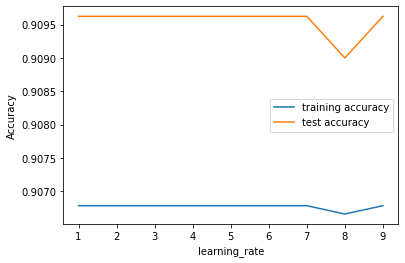

In [71]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [72]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [73]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [75]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.907
XGBoost Classifier : Accuracy on test Data: 0.909

XGBoost Classifier : f1_score on training Data: 0.898
XGBoost Classifier : f1_score on test Data: 0.904

XGBoost Classifier : Recall on training Data: 0.822
XGBoost Classifier : Recall on test Data: 0.822

XGBoost Classifier : precision on training Data: 0.989
XGBoost Classifier : precision on test Data: 0.989


In [76]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [77]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [78]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [79]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.906
Multi-layer Perceptron : Accuracy on test Data: 0.909

Multi-layer Perceptron : f1_score on training Data: 0.897
Multi-layer Perceptron : f1_score on test Data: 0.897

Multi-layer Perceptron : Recall on training Data: 0.821
Multi-layer Perceptron : Recall on test Data: 0.831

Multi-layer Perceptron : precision on training Data: 0.989
Multi-layer Perceptron : precision on test Data: 0.990


In [80]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [81]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 14)                238       
                                                                 
 dense_2 (Dense)             (None, 12)                180       
                                                                 
 dense_3 (Dense)             (None, 14)                182       
                                                                 
 dense_4 (Dense)             (None, 16)                240       
                                                                 
 dense_5 (Dense)             (None, 16)                272   

In [82]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

250/250 [==============================] - 1s 2ms/step - loss: -5707120640.0000 - accuracy: 0.6531

Autoencoder: Accuracy on training Data: 0.663
Autoencoder: Accuracy on test Data: 0.653


In [83]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [84]:
clf.score(X_train, y_train)

0.90171875

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.903875


In [86]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3910
           1       0.98      0.83      0.90      4090

    accuracy                           0.90      8000
   macro avg       0.91      0.91      0.90      8000
weighted avg       0.92      0.90      0.90      8000



<AxesSubplot:>

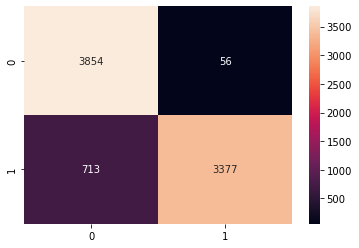

In [87]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [88]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [89]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.898,0.890,0.797,0.993
1,K-Nearest Neighbors,0.908,0.903,0.821,0.988
2,Support Vector Machine,0.908,0.902,0.818,0.988
3,Naive Bayes Classifier,0.897,0.890,0.801,0.987
4,Decision Tree,0.910,0.904,0.822,0.989
5,Random Forest,0.910,0.904,0.822,0.989
6,Gradient Boosting Classifier,0.909,0.904,0.822,0.989
7,CatBoost Classifier,0.910,0.904,0.822,0.989
8,XGBoost Classifier,0.910,0.904,0.822,0.989
9,Multi-layer Perceptron,0.910,0.904,0.821,0.989


In [90]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [91]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.910,0.904,0.822,0.989
1,Random Forest,0.910,0.904,0.822,0.989
2,CatBoost Classifier,0.910,0.904,0.822,0.989
3,XGBoost Classifier,0.910,0.904,0.822,0.989
4,Multi-layer Perceptron,0.910,0.904,0.821,0.989
5,Gradient Boosting Classifier,0.909,0.904,0.822,0.989
6,K-Nearest Neighbors,0.908,0.903,0.821,0.988
7,Support Vector Machine,0.908,0.902,0.818,0.988
8,Logistic Regression,0.898,0.890,0.797,0.993
9,Naive Bayes Classifier,0.897,0.890,0.801,0.987


In [99]:
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators=100)
model_2 = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
model_3 =  XGBClassifier()
model_4 = CatBoostClassifier(learning_rate  = 0.1)
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1),('Gradientboosting',model_2),
                                        ('xgbclassifier',model_3),('catboost',model_4),
                                        ('DT', model_5)], voting='hard')

In [100]:
import time
ensemble.fit(X_train, y_train)
start_time = time.time()
y_pred_test = ensemble.predict(X_test)
end_time = time.time()
duration = end_time - start_time
print('Time taken by model:', duration, 'seconds')
y_pred_train = ensemble.predict(X_train)

0:	learn: 0.5431285	total: 15.1ms	remaining: 15.1s
1:	learn: 0.4471222	total: 29.2ms	remaining: 14.6s
2:	learn: 0.3874315	total: 42.6ms	remaining: 14.1s
3:	learn: 0.3514443	total: 56.1ms	remaining: 14s
4:	learn: 0.3248932	total: 68.7ms	remaining: 13.7s
5:	learn: 0.3064110	total: 80.5ms	remaining: 13.3s
6:	learn: 0.2946559	total: 92.2ms	remaining: 13.1s
7:	learn: 0.2854644	total: 104ms	remaining: 12.9s
8:	learn: 0.2776952	total: 116ms	remaining: 12.7s
9:	learn: 0.2719870	total: 128ms	remaining: 12.6s
10:	learn: 0.2660434	total: 140ms	remaining: 12.6s
11:	learn: 0.2623930	total: 151ms	remaining: 12.4s
12:	learn: 0.2583360	total: 163ms	remaining: 12.4s
13:	learn: 0.2547394	total: 175ms	remaining: 12.3s
14:	learn: 0.2524963	total: 187ms	remaining: 12.3s
15:	learn: 0.2502333	total: 197ms	remaining: 12.1s
16:	learn: 0.2486038	total: 211ms	remaining: 12.2s
17:	learn: 0.2471899	total: 225ms	remaining: 12.3s
18:	learn: 0.2455194	total: 239ms	remaining: 12.4s
19:	learn: 0.2446683	total: 251ms	re

168:	learn: 0.2323415	total: 1.99s	remaining: 9.79s
169:	learn: 0.2323418	total: 2s	remaining: 9.78s
170:	learn: 0.2323425	total: 2.01s	remaining: 9.77s
171:	learn: 0.2323421	total: 2.02s	remaining: 9.75s
172:	learn: 0.2323416	total: 2.04s	remaining: 9.73s
173:	learn: 0.2323416	total: 2.04s	remaining: 9.71s
174:	learn: 0.2323416	total: 2.06s	remaining: 9.69s
175:	learn: 0.2323416	total: 2.06s	remaining: 9.67s
176:	learn: 0.2323416	total: 2.08s	remaining: 9.65s
177:	learn: 0.2323416	total: 2.08s	remaining: 9.63s
178:	learn: 0.2323416	total: 2.1s	remaining: 9.61s
179:	learn: 0.2323411	total: 2.11s	remaining: 9.59s
180:	learn: 0.2323411	total: 2.12s	remaining: 9.58s
181:	learn: 0.2323411	total: 2.13s	remaining: 9.55s
182:	learn: 0.2323411	total: 2.13s	remaining: 9.53s
183:	learn: 0.2323411	total: 2.15s	remaining: 9.51s
184:	learn: 0.2323411	total: 2.15s	remaining: 9.49s
185:	learn: 0.2323411	total: 2.16s	remaining: 9.47s
186:	learn: 0.2323411	total: 2.17s	remaining: 9.45s
187:	learn: 0.23

328:	learn: 0.2322949	total: 3.69s	remaining: 7.52s
329:	learn: 0.2322949	total: 3.7s	remaining: 7.51s
330:	learn: 0.2322949	total: 3.71s	remaining: 7.5s
331:	learn: 0.2322949	total: 3.72s	remaining: 7.49s
332:	learn: 0.2322949	total: 3.73s	remaining: 7.48s
333:	learn: 0.2322949	total: 3.74s	remaining: 7.47s
334:	learn: 0.2322949	total: 3.75s	remaining: 7.45s
335:	learn: 0.2322949	total: 3.77s	remaining: 7.44s
336:	learn: 0.2322949	total: 3.78s	remaining: 7.43s
337:	learn: 0.2322949	total: 3.79s	remaining: 7.42s
338:	learn: 0.2322949	total: 3.8s	remaining: 7.41s
339:	learn: 0.2322949	total: 3.81s	remaining: 7.39s
340:	learn: 0.2322949	total: 3.82s	remaining: 7.38s
341:	learn: 0.2322949	total: 3.83s	remaining: 7.37s
342:	learn: 0.2322949	total: 3.84s	remaining: 7.36s
343:	learn: 0.2322949	total: 3.85s	remaining: 7.35s
344:	learn: 0.2322949	total: 3.86s	remaining: 7.33s
345:	learn: 0.2322949	total: 3.87s	remaining: 7.32s
346:	learn: 0.2322949	total: 3.89s	remaining: 7.32s
347:	learn: 0.2

492:	learn: 0.2322949	total: 5.38s	remaining: 5.54s
493:	learn: 0.2322949	total: 5.39s	remaining: 5.53s
494:	learn: 0.2322949	total: 5.43s	remaining: 5.54s
495:	learn: 0.2322949	total: 5.45s	remaining: 5.53s
496:	learn: 0.2322949	total: 5.46s	remaining: 5.52s
497:	learn: 0.2322949	total: 5.47s	remaining: 5.51s
498:	learn: 0.2322949	total: 5.48s	remaining: 5.5s
499:	learn: 0.2322949	total: 5.49s	remaining: 5.49s
500:	learn: 0.2322949	total: 5.5s	remaining: 5.47s
501:	learn: 0.2322949	total: 5.51s	remaining: 5.46s
502:	learn: 0.2322949	total: 5.52s	remaining: 5.45s
503:	learn: 0.2322949	total: 5.53s	remaining: 5.44s
504:	learn: 0.2322949	total: 5.54s	remaining: 5.43s
505:	learn: 0.2322949	total: 5.55s	remaining: 5.42s
506:	learn: 0.2322949	total: 5.56s	remaining: 5.4s
507:	learn: 0.2322949	total: 5.57s	remaining: 5.39s
508:	learn: 0.2322949	total: 5.58s	remaining: 5.38s
509:	learn: 0.2322949	total: 5.59s	remaining: 5.37s
510:	learn: 0.2322949	total: 5.6s	remaining: 5.36s
511:	learn: 0.23

657:	learn: 0.2322949	total: 7.09s	remaining: 3.69s
658:	learn: 0.2322949	total: 7.1s	remaining: 3.67s
659:	learn: 0.2322949	total: 7.11s	remaining: 3.66s
660:	learn: 0.2322949	total: 7.12s	remaining: 3.65s
661:	learn: 0.2322949	total: 7.13s	remaining: 3.64s
662:	learn: 0.2322949	total: 7.14s	remaining: 3.63s
663:	learn: 0.2322949	total: 7.15s	remaining: 3.62s
664:	learn: 0.2322949	total: 7.16s	remaining: 3.61s
665:	learn: 0.2322949	total: 7.17s	remaining: 3.6s
666:	learn: 0.2322949	total: 7.18s	remaining: 3.59s
667:	learn: 0.2322949	total: 7.19s	remaining: 3.58s
668:	learn: 0.2322949	total: 7.2s	remaining: 3.56s
669:	learn: 0.2322949	total: 7.21s	remaining: 3.55s
670:	learn: 0.2322949	total: 7.22s	remaining: 3.54s
671:	learn: 0.2322949	total: 7.24s	remaining: 3.53s
672:	learn: 0.2322949	total: 7.25s	remaining: 3.52s
673:	learn: 0.2322949	total: 7.26s	remaining: 3.51s
674:	learn: 0.2322949	total: 7.26s	remaining: 3.5s
675:	learn: 0.2322949	total: 7.27s	remaining: 3.49s
676:	learn: 0.23

829:	learn: 0.2322949	total: 8.82s	remaining: 1.81s
830:	learn: 0.2322949	total: 8.83s	remaining: 1.8s
831:	learn: 0.2322949	total: 8.84s	remaining: 1.78s
832:	learn: 0.2322949	total: 8.85s	remaining: 1.77s
833:	learn: 0.2322949	total: 8.86s	remaining: 1.76s
834:	learn: 0.2322949	total: 8.87s	remaining: 1.75s
835:	learn: 0.2322949	total: 8.88s	remaining: 1.74s
836:	learn: 0.2322949	total: 8.89s	remaining: 1.73s
837:	learn: 0.2322949	total: 8.9s	remaining: 1.72s
838:	learn: 0.2322949	total: 8.91s	remaining: 1.71s
839:	learn: 0.2322949	total: 8.92s	remaining: 1.7s
840:	learn: 0.2322949	total: 8.93s	remaining: 1.69s
841:	learn: 0.2322949	total: 8.94s	remaining: 1.68s
842:	learn: 0.2322949	total: 8.95s	remaining: 1.67s
843:	learn: 0.2322949	total: 8.96s	remaining: 1.66s
844:	learn: 0.2322949	total: 8.97s	remaining: 1.65s
845:	learn: 0.2322949	total: 8.98s	remaining: 1.64s
846:	learn: 0.2322949	total: 8.99s	remaining: 1.62s
847:	learn: 0.2322949	total: 9s	remaining: 1.61s
848:	learn: 0.2322

997:	learn: 0.2322949	total: 10.6s	remaining: 21.2ms
998:	learn: 0.2322949	total: 10.6s	remaining: 10.6ms
999:	learn: 0.2322949	total: 10.6s	remaining: 0us
Time taken by model: 0.2432703971862793 seconds


In [102]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset  : ', train_accurry)
print('Accuracy for test dataset: ', test_accurry)

Accuracy for train dataset  :  0.90678125
Accuracy for test dataset:  0.909625


In [103]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(ensemble, open(filename, 'wb'))

In [108]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [109]:
import os
import pickle

if not os.path.exists('pickle'):
    os.makedirs('pickle')

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [106]:
# current_directory = os.getcwd()

In [107]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), gbc.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.title("Feature importances using permutation on full model")
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()